<a href="https://colab.research.google.com/github/AcSsalazar/Proyecto_1_udem/blob/main/MP_Consumos_BarbosaV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Control inventario de materias primas con apoyo de la ciencia de datos
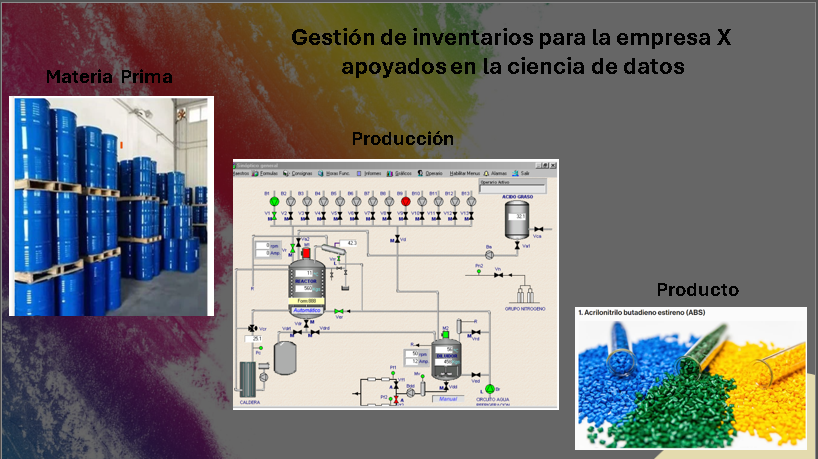

La empresa X, desde hace 10 años, se dedica a la fabricación de productos para la construcción como: resinas acrílicas, pinturas industriales, recubrimientos para madera, entre otros; y lo hacen procesando las siguientes materias primas: Soda, Xilol, Toluol, 2EHA, Vam, Butil, Ethil, Metil y Estireno. Para la empresa la precisión en el control de inventarios sobre estos insumos es esencial, ya que las materias primas son costosas y altamente sensibles a las condiciones de almacenamiento. La empresa ha experimentado inconsistencias en estos inventarios, afectando la eficiencia de la producción y su estado financiero.

Es claro que actualmente, la empresa enfrenta problemas de gestión de inventario. A pesar de contar con un sistema automático de control de materiales, existen diferencias significativas entre el inventario registrado en almacén y el consumo reportado en producción, lo que ha generado pérdidas financieras y operativas como: (tiempo del recurso humano, costos por almacenamiento, costo logístico y por desabastecimiento). La falta de un sistema de monitoreo en tiempo real y métodos adecuados para prever la demanda ha llevado a frecuentes desajustes. Estos desajustes pueden deberse a errores en el registro de los datos de entrada (SP) en el controlador de los reactores manipulado por parte de los operarios, solo cuándo la producción está en modo semiautomático o también se dan por problemas en la trazabilidad de los lotes de las materias primas. Esto ha generado tiempos de espera en producción, altos costos de almacenamiento para materias primas que no se usan de inmediato y está impactando la rentabilidad y la competitividad de la empresa.


Este proyecto se enfocará en el diseño e implementación de un sistema de control de inventarios que permita la planificación eficiente de las materias primas. Para ello, se cuenta con una base de datos en tiempo real, con información de recetas y adiciones manuales que realizan los operarios en modo semiautomático para la producción.
El objetivo del proyecto será analizar estos datos para encontrar:
Patrones de consumo para encontrar inconsistencias.
Identificar las causas de las variaciones que hay en los inventarios y los reportes de producción.
Desarrollar un modelo predictivo para optimizar la gestión de inventarios, alineando el inventario disponible del almacén con la demanda real de la producción.
Causas y efectos
Las causas del problema incluyen la falta de un sistema de monitoreo continuo, prácticas de compra sin planeación y una previsión de demanda insuficiente. Los efectos de estos problemas se manifiestan en mayores costos, tiempos de producción detenidos y afectación de la rentabilidad de la empresa.

**Variables**

Se deben analizar las variables numericas:
 - Set Point(Solicitudes de materias primas en kg, se abrevia generalmente como SP)
 - Consumo (La metrica del consumo de los sensores de flujo másico, se abrevia como PV)

Se deben analizar variables categoricas como:
 - Solicitudes, partidas o lotes
 - Equipos(los cuales hacen referencia a reactores, tanques o diluidores)
 - Tipo de Solicitud(Receta o semiautomatico)

Se analizan en tiempo ya que son variables que se almacenan en funcion del tiempo
 - TimeStamp

 **Materias Primas**
1. Soda
2. Xilo
3. Toluol
4. 2EHA
5. Vam
6. Butil
7. Ethil
8. Metil
9. Estireno

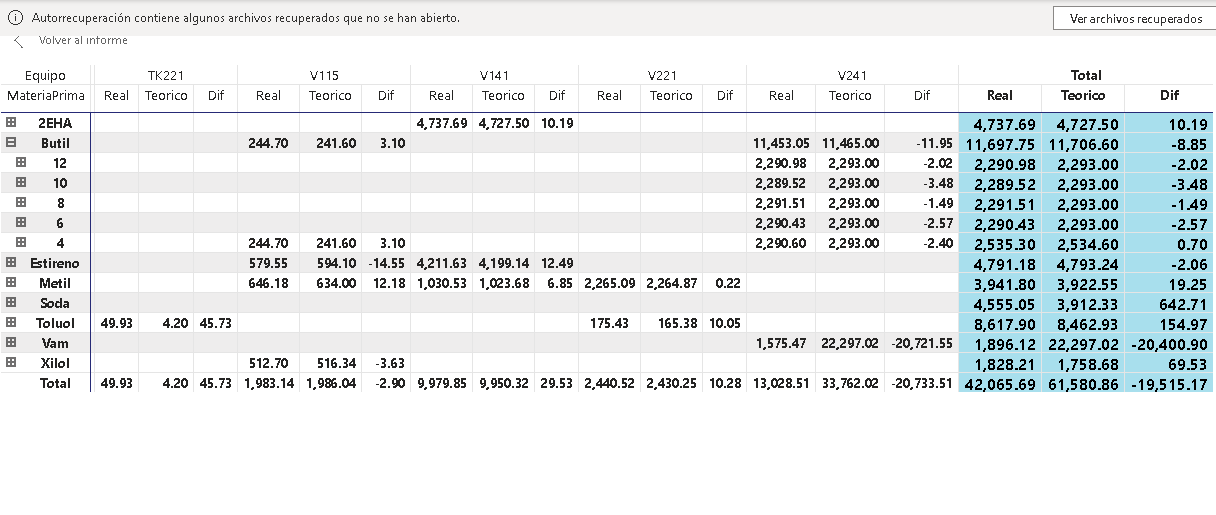

# 2. Cargando Librerias y el conjunto de datos

*2.1. Carga de Librerias*

In [146]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose



*2.2. Carga de datos*

Se realiza carga de Datos por medio de parametro de la materia prima, esta materia prima esta en una hoja del libro de Excel. La función devuelve el DataFrame sample_df con los datos procesados, listo para análisis adicionales.

In [2]:
#2.2
archivo_excel = 'Data.xlsx'
hojas = pd.ExcelFile(archivo_excel).sheet_names
hojas.remove("Tags")
hojas.remove("MP-EQUIPO")

MateriasPrimas=tuple(hojas)


def DataMp(materiaPrima):
    sample_df = pd.read_excel(archivo_excel, sheet_name=materiaPrima,decimal='.', header=0, usecols="C:AO", skiprows=2)
    sample_df['TimeStamp'] = pd.to_datetime(sample_df['TimeStamp'])
    sample_df.set_index('TimeStamp', inplace=True)
    sample_df = sample_df.rename(columns={col: col +' ' +materiaPrima for col in sample_df.columns})
    sample_df["MateriaPrima"]=materiaPrima

    return sample_df

MateriasPrimas

('Soda',
 'Xilol',
 'Toluol',
 '2EHA',
 'Vam',
 'Butil',
 'Ethil',
 'Metil',
 'Estireno')

Se genere el Data Frame por cada materia prima, invocando la funcion DataMp descrita anteriormente.
Se recorre la tupla de materias primas con un for y se crea un diccionario con los data frame

In [3]:
sample_dfs={}
for mp in MateriasPrimas:
    print(mp)
    sample_dfs[mp]=DataMp(str(mp))
# sample_dfSoda=DataMp("Soda")
# sample_dfXilol=DataMp("Xilol")
# sample_dfToluol=DataMp("Toluol")
# sample_df2EHA=DataMp("2EHA")
# sample_dfVAM=DataMp("Vam")
# sample_dfButil=DataMp("Butil")
# sample_dfEthil=DataMp("Ethil")
# sample_dfMetil=DataMp("Metil")
# sample_dfEstireno=DataMp("Estireno")
# sample_dfSoda
sample_dfs

Soda
Xilol
Toluol
2EHA
Vam
Butil
Ethil
Metil
Estireno


{'Soda':                         Partida R131 Soda Estado Bombeo Semi R131 Soda  \
 TimeStamp                                                                
 2024-10-22 16:40:29.032          10126959                     Inactive   
 2024-10-22 16:41:29.032          10126959                     Inactive   
 2024-10-22 16:42:29.032          10126959                     Inactive   
 2024-10-22 16:43:29.032          10126959                     Inactive   
 2024-10-22 16:44:29.032          10126959                     Inactive   
 ...                                   ...                          ...   
 2024-10-29 16:36:29.032          10127420                     Inactive   
 2024-10-29 16:37:29.032          10127420                     Inactive   
 2024-10-29 16:38:29.032          10127420                     Inactive   
 2024-10-29 16:39:29.032          10127420                     Inactive   
 2024-10-29 16:40:29.032          10127420                     Inactive   
 
               

In [4]:
MpGlobal = pd.concat([df for df in sample_dfs.values()], ignore_index=True)

# MpGlobal= pd.concat([sample_dfSoda,
#                      sample_dfXilol,
#                      sample_dfToluol,
#                      sample_df2EHA,
#                      sample_dfVAM,
#                      sample_dfButil,
#                      sample_dfEthil,
#                      sample_dfMetil,
#                      sample_dfEstireno
#                      ],axis=1)
MpGlobal

Partida R131 Soda Estado Bombeo Semi R131 Soda  SP Semi R131 Soda  \
0              10126959                     Inactive         194.916870   
1              10126959                     Inactive         194.898575   
2              10126959                     Inactive         194.880264   
3              10126959                     Inactive         194.861969   
4              10126959                     Inactive         194.843674   
...                 ...                          ...                ...   
33124               NaN                          NaN                NaN   
33125               NaN                          NaN                NaN   
33126               NaN                          NaN                NaN   
33127               NaN                          NaN                NaN   
33128               NaN                          NaN                NaN   

      Estado Bombeo Receta R131 Soda  SP Receta R131 Soda  Consumo R131 Soda  \
0                           Inactive          1096.303711        1287.890869   
1                           Inactive          1096.270264        1287.890869   
2                           Inactive          1096.236938        1287.890869   
3                           Inactive          1096.203613        1287.890869   
4                           Inactive          1096.170288        1287.890869   
...                              ...                  ...                ...   
33124                            NaN                  NaN                NaN   
33125                            NaN                  NaN                NaN   
33126                            NaN                  NaN                NaN   
33127                            NaN                  NaN                NaN   
33128                            NaN                  NaN                NaN   

      Partida TK131 Soda Estado Bombeo Semi TK131 Soda  SP Semi TK131 Soda  \
0               12345678                        Active          638.449890   
1               12345678                        Active          638.238098   
2               12345678                        Active          638.026306   
3               12345678                        Active          637.814453   
4               12345678                        Active          637.602661   
...                  ...                           ...                 ...   
33124                NaN                           NaN                 NaN   
33125                NaN                           NaN                 NaN   
33126                NaN                           NaN                 NaN   
33127                NaN                           NaN                 NaN   
33128                NaN                           NaN                 NaN   

       Consumo TK131 Soda  ... SP Receta V221 Estireno Consumo V221 Estireno  \
0             1788.473145  ...                     NaN                   NaN   
1             1804.062256  ...                     NaN                   NaN   
2             1819.701782  ...                     NaN                   NaN   
3             1835.358887  ...                     NaN                   NaN   
4             1850.113892  ...                     NaN                   NaN   
...                   ...  ...                     ...                   ...   
33124                 NaN  ...                     0.0           1844.860229   
33125                 NaN  ...                     0.0           1844.860229   
33126                 NaN  ...                     0.0           1844.860229   
33127                 NaN  ...                     0.0           1844.860229   
33128                 NaN  ...                     0.0           1844.860229   

       Partida V241 Estireno Estado Bombeo Semi V241 Estireno  \
0                        NaN                              NaN   
1                        NaN                              NaN   
2                        NaN                       

# 3. Analisis de Datos Exploratorios

*3.1. Estadística descriptiva*

EDA de Soda

In [5]:
# MpGlobal.describe()
pd.set_option('display.max_columns', None)

MpGlobalDrop = MpGlobal.select_dtypes(include=['number'])
MpGlobalDrop = MpGlobalDrop.loc[:, (MpGlobalDrop != 0.0).any(axis=0)]
MpGlobalDrop = MpGlobalDrop.loc[:, MpGlobalDrop.nunique() > 1]
MpGlobalDrop = MpGlobalDrop.dropna(axis=1, how='all')

# MpGlobalDrop=MpGlobalDrop.drop(columns=['SP Receta R141 Soda','Consumo R141 Soda','SP Receta V142 Soda','Consumo V142 Soda','SP Semi TK141 Soda','Consumo TK141 Soda','Partida R221 Soda','SP Receta R111 Xilol','Consumo R111 Xilol','SP Semi V221 Estireno','SP Receta V221 Estireno','SP Semi V131 Estireno','SP Receta V131 Estireno','Consumo V131 Estireno','SP Semi V241 Estireno','SP Receta V241 Estireno','SP Semi D122 Estireno','SP Receta D122 Estireno','SP Receta V115 Estireno','Consumo D122 Estireno','SP Semi R221 Xilol','SP Receta R221 Xilol','Consumo R221 Xilol','Consumo V221 Xilol','Partida TK221 Xilol','Partida R221 Xilol'])
MpGlobalDrop.describe()


SP Semi R131 Soda  SP Receta R131 Soda  Consumo R131 Soda  \
count       10081.000000         10081.000000       10081.000000   
mean          102.696824           929.790369        1197.199277   
std            53.243840            94.605240         236.791434   
min            12.000000           793.000000           0.000371   
25%            56.577095           844.109070        1287.872681   
50%           102.690353           928.173950        1287.890991   
75%           148.803604          1012.238831        1287.890991   
max           194.916870          1096.303711        1287.893677   

       SP Semi TK131 Soda  Consumo TK131 Soda  SP Semi R141 Soda  \
count        10081.000000        10081.000000       10081.000000   
mean           518.716366          406.371745         941.646807   
std            206.518551          508.254669         534.477462   
min             13.865457            0.000000          30.000000   
25%            364.549408           10.023966         478.708038   
50%            616.836304          330.017334         941.591858   
75%            653.761353          655.009888        1404.475586   
max           1030.000000         2500.017334        1867.359375   

       SP Semi V142 Soda  SP Semi R111 Xilol  Consumo R111 Xilol  \
count       10081.000000         2881.000000         2881.000000   
mean          293.172488          153.231250          181.241238   
std           174.003813           98.844222          201.097250   
min             5.000000            5.000000            0.004243   
25%           142.115051           55.647015           22.107874   
50%           293.014435          169.738953          120.051346   
75%           443.913788          253.723297          246.544052   
max           594.813171          269.992554          776.831421   

       SP Semi V115 Xilol  SP Receta V115 Xilol  Consumo V115 Xilol  \
count         2881.000000           2881.000000         2881.000000   
mean            16.496029            177.552617           65.551486   
std              8.456630             23.798720           56.889074   
min              5.000000            129.014313            0.000000   
25%              8.542638            157.512726           14.555838   
50%             16.217321            194.000000           52.420513   
75%             23.892004            194.000000          109.362244   
max             31.566689            194.000000          193.842545   

       SP Semi TK112 Xilol  Consumo TK112 Xilol  SP Semi V115 Toluol  \
count          2881.000000          2881.000000          2881.000000   
mean              3.869727             6.807178            18.622037   
std               0.819871             4.932864            10.000138   
min               2.413345             0.000840             5.000000   
25%               3.153335             2.215633             9.230727   
50%               3.893324             6.666423            18.298754   
75%               4.633314            11.117213            27.366781   
max               5.000000            15.568004            36.434811   

       Consumo V115 Toluol  SP Semi R221 Toluol  SP Receta R221 Toluol  \
count          2881.000000          2881.000000            2881.000000   
mean             11.312267           311.363838             483.695041   
std               8.304432           345.362272             610.815484   
min              -0.000044             0.022912               0.000000   
25%               3.513494            16.953230               0.000000   
50%              11.043835            19.657553             178.669205   
75%              18.574175           730.000000             825.499573   
max              26.104517           730.000000            2047.959229   

       Consumo R221 Toluol  SP Receta V221 Toluol  Consumo V221 Toluol  \
count          2881.000000            2881.000000          2881.000000   
mean            980.426593              17.343544            57.

*3.2. Visualización de datos*



Veamos la distribución de los datos durante todo el período.

Se crea funcion para mostrar el histograma de cada materia prima, se pone como parametro df que es el data frame de cada materia prima

array([[<Axes: title={'center': 'SP Semi R131 Soda'}>,
        <Axes: title={'center': 'SP Receta R131 Soda'}>,
        <Axes: title={'center': 'Consumo R131 Soda'}>,
        <Axes: title={'center': 'SP Semi TK131 Soda'}>,
        <Axes: title={'center': 'Consumo TK131 Soda'}>,
        <Axes: title={'center': 'SP Semi R141 Soda'}>,
        <Axes: title={'center': 'SP Semi V142 Soda'}>],
       [<Axes: title={'center': 'SP Semi R111 Xilol'}>,
        <Axes: title={'center': 'Consumo R111 Xilol'}>,
        <Axes: title={'center': 'SP Semi V115 Xilol'}>,
        <Axes: title={'center': 'SP Receta V115 Xilol'}>,
        <Axes: title={'center': 'Consumo V115 Xilol'}>,
        <Axes: title={'center': 'SP Semi TK112 Xilol'}>,
        <Axes: title={'center': 'Consumo TK112 Xilol'}>],
       [<Axes: title={'center': 'SP Semi V115 Toluol'}>,
        <Axes: title={'center': 'Consumo V115 Toluol'}>,
        <Axes: title={'center': 'SP Semi R221 Toluol'}>,
        <Axes: title={'center': 'SP Receta

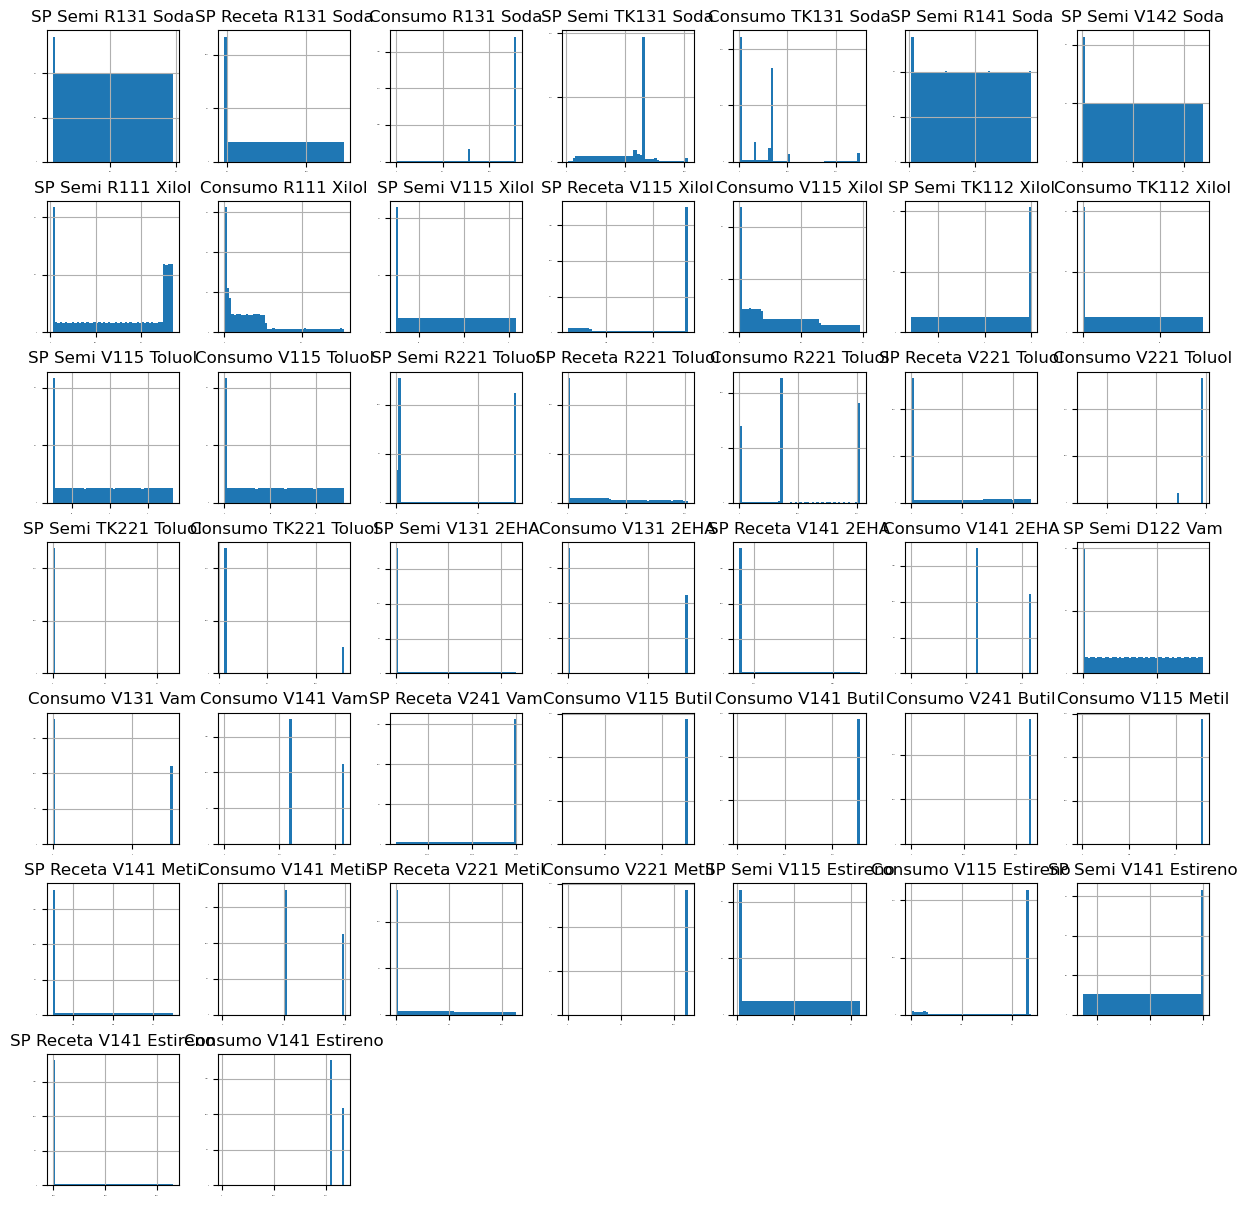

In [6]:
# def VisualizacionHis(df):
MpGlobalDrop.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,15))
    # pyplot.show()


En este histograma muestra la distribución de cada serie individualmente.

 Distribución de densidad en la misma escala del eje x.

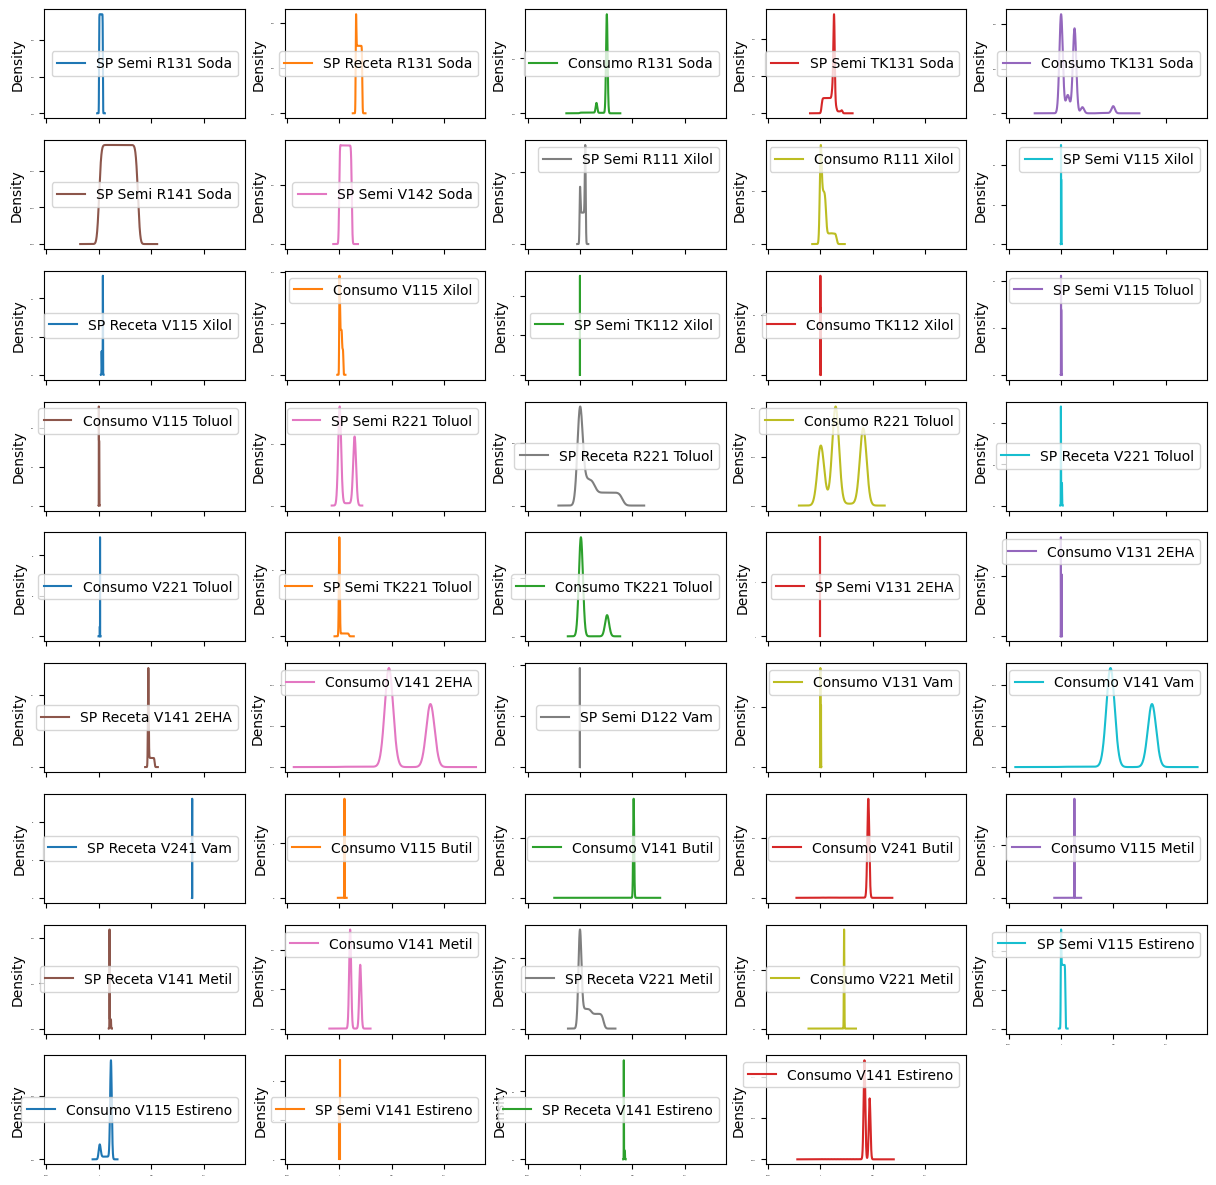

In [7]:
MpGlobalDrop.plot(kind='density', subplots=True, layout=(9,5), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

Para tener una idea de la interdependencia de los datos, observamos el diagrama de dispersión y la matriz de correlación.

Grafico de correcion Global

<Axes: title={'center': 'Correlation Matrix'}>

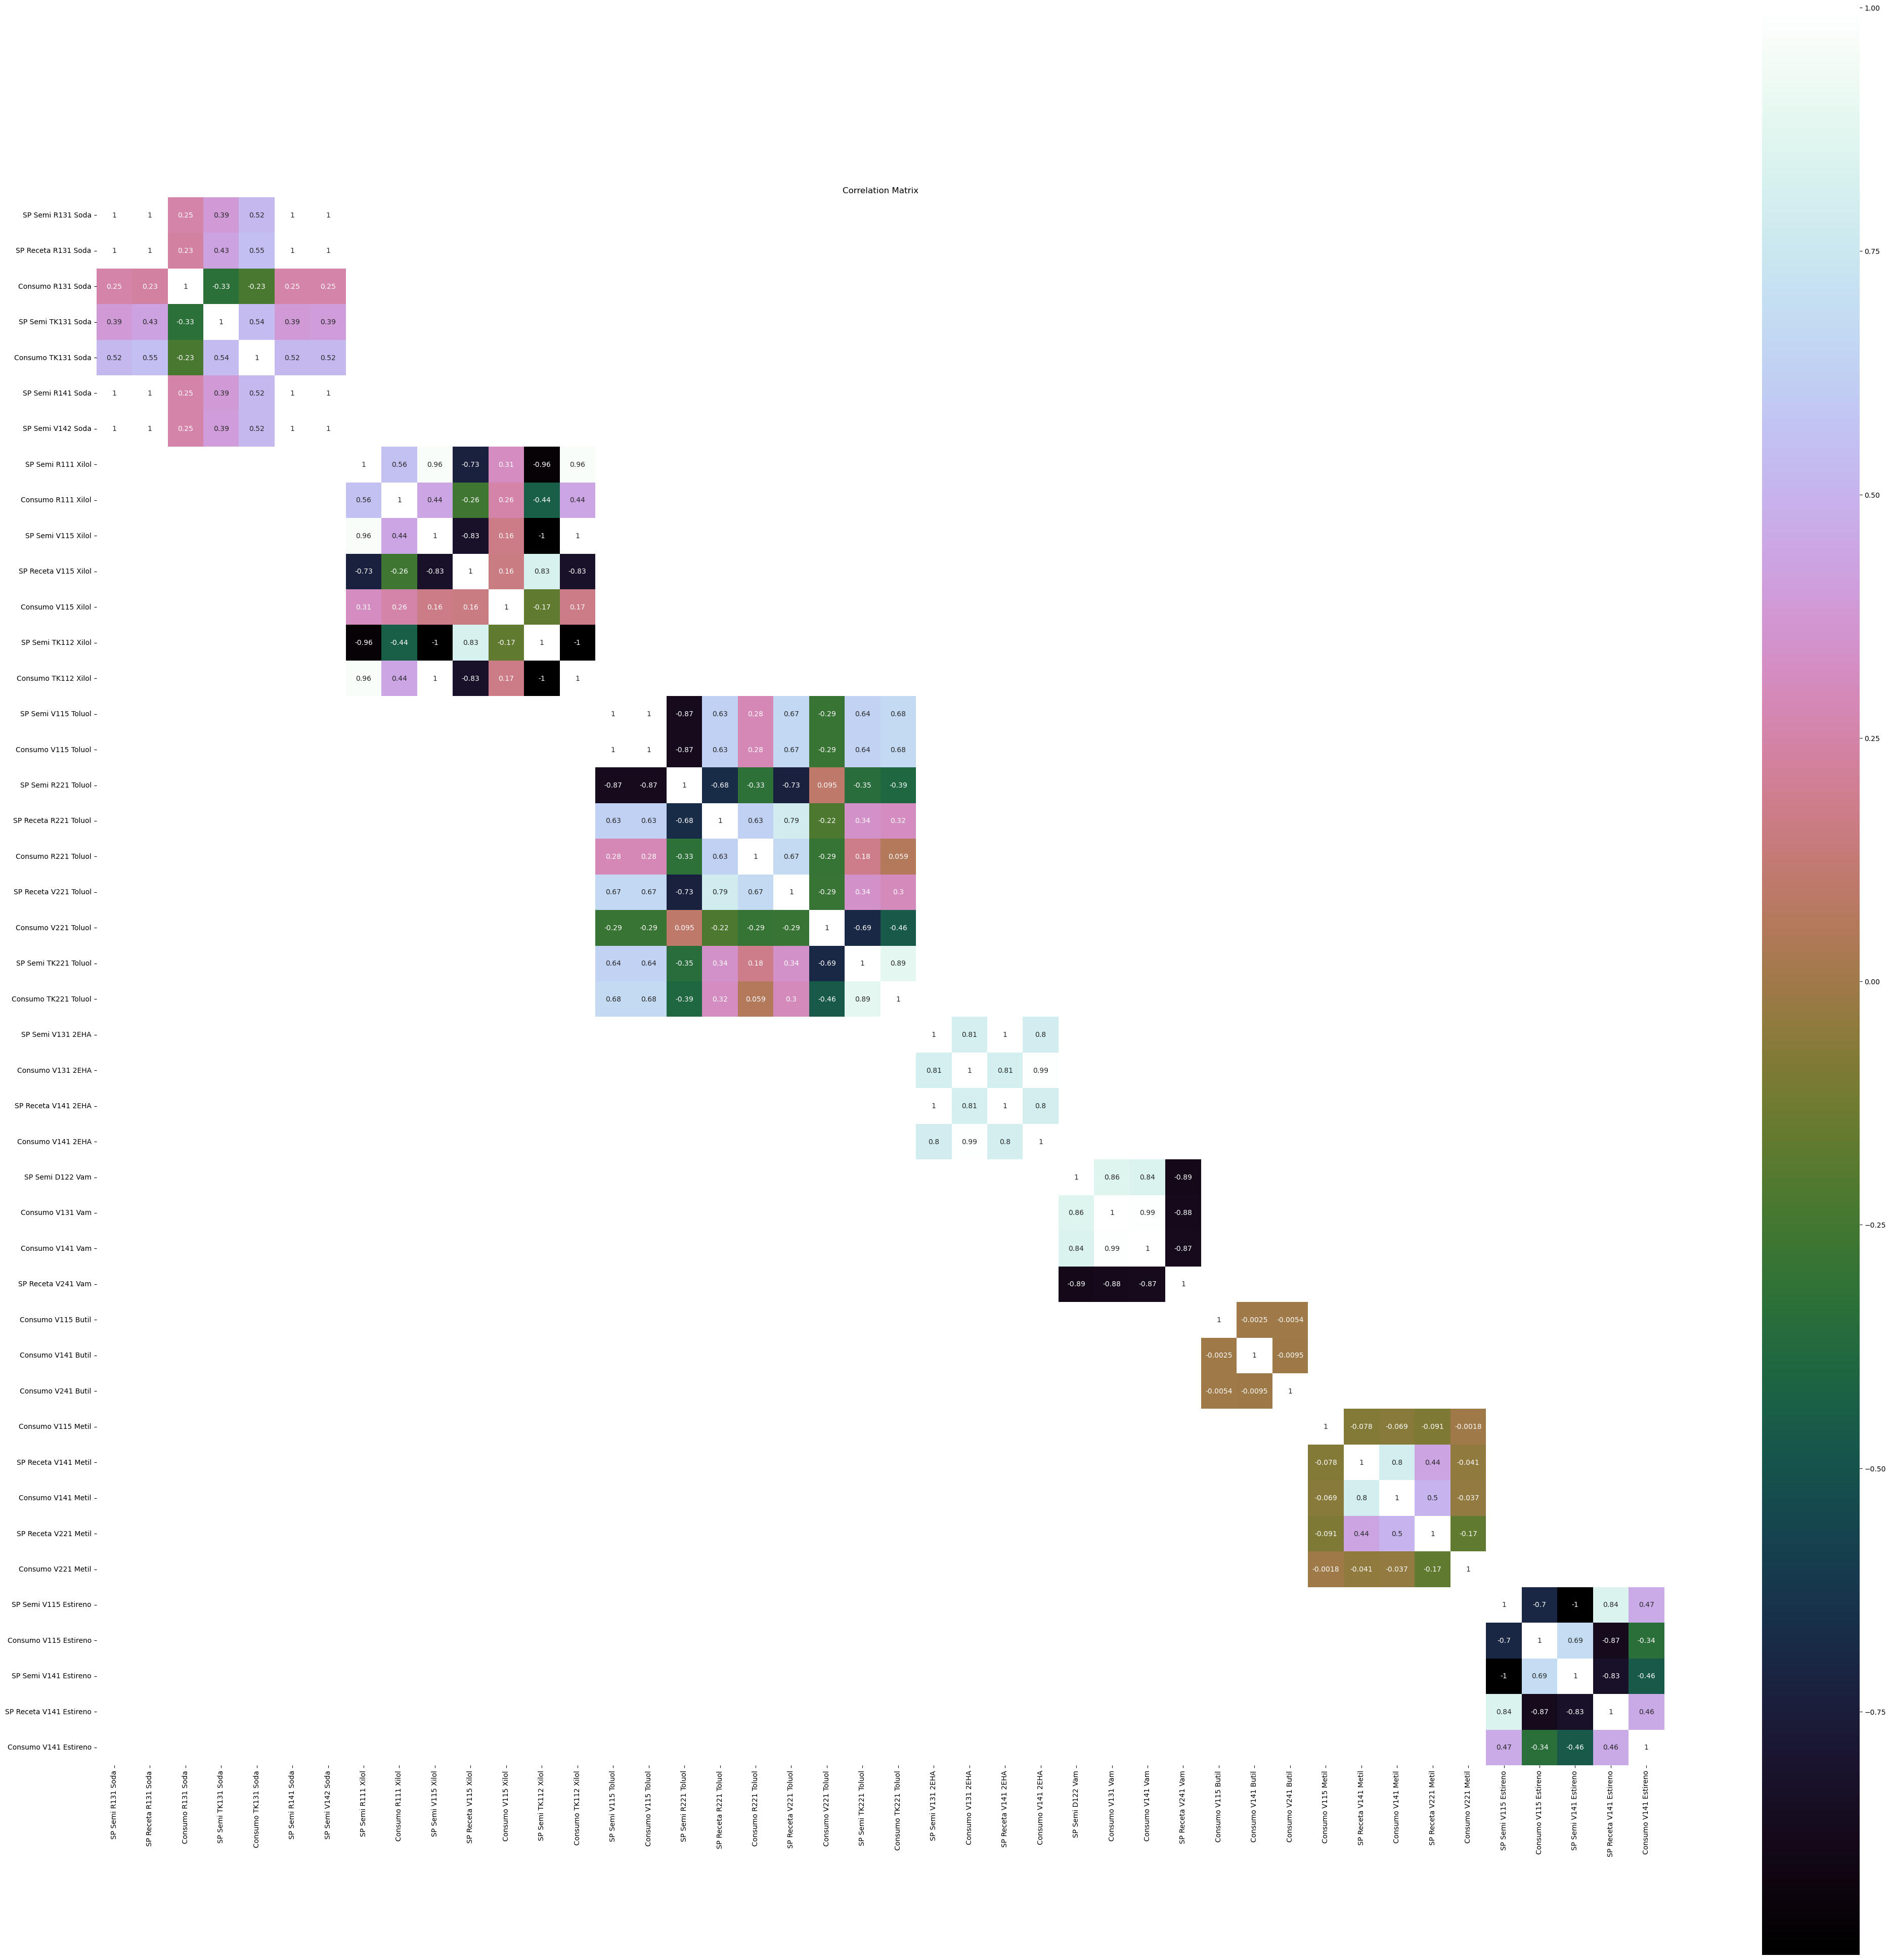

In [8]:
# def EdaCorr(df,mp):
MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Partida').columns, axis=1)
MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Estado').columns, axis=1)
MpGlobalDrop = MpGlobalDrop.replace('Bad Input', 0)
MpGlobalDrop = MpGlobalDrop.replace('Tag not found', 0)
correlation = MpGlobalDrop.corr()
pyplot.figure(figsize=(50,50))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

Grafico de dispersion

In [9]:

MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Partida').columns, axis=1)
MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Estado').columns, axis=1)
MpGlobalDrop = MpGlobalDrop.replace('Bad Input', 0)
MpGlobalDrop = MpGlobalDrop.replace('Tag not found', 0)
pyplot.figure(figsize=(100,100))
scatter_matrix(MpGlobalDrop,figsize=(100,100))
pyplot.show()

<Figure size 10000x10000 with 0 Axes>

*3.3 Analisis de la serie de tiempo*

# 4. Preparacion de Datos

In [121]:
def identificar_sp_activo(row, equipo, materiaPrima):
    if 'Activo_Receta' + equipo+' '+materiaPrima in row:
        if row['Activo_Receta' + equipo+' '+materiaPrima]:
            return 'SP Receta ' + equipo
        elif row['Activo_Semi' + equipo+' '+materiaPrima]:
            return 'SP Semi ' + equipo
        else:
            return 'Ninguno'
    elif 'Activo_Semi' + equipo+' '+materiaPrima in row:
        if row['Activo_Semi' + equipo+' '+materiaPrima]:
            return 'SP Semi ' + equipo
    return 'Ninguno'



# Identificar si el bombeo está activo
def CalculoMP(equipo,sample_df,materiaPrima):
    sample_df['Time_Stamp'] = sample_df.index
    sample_df['Activo_Semi' + equipo +' '+materiaPrima] = sample_df['Estado Bombeo Semi '+ equipo+' '+materiaPrima] == 'Active'
   
    if 'Estado Bombeo Receta ' + equipo+' '+materiaPrima in sample_df.columns:
        sample_df['Activo_Receta' + equipo+' '+materiaPrima] = sample_df['Estado Bombeo Receta '+ equipo+' '+materiaPrima] == 'Active'


    # Crear una columna que identifique el nuevo SP activo
    # Aplicar la función para identificar el SP activo en cada momento
    # sample_df['SP_Activo' + equipo] = sample_df.apply(identificar_sp_activo, axis=1)
    sample_df['SP_Activo' + equipo+' '+materiaPrima] = sample_df.apply(identificar_sp_activo, axis=1, args=(equipo,materiaPrima,))


    # Crear una columna con el valor del SP activo en cada momento
    sample_df['Valor_SP_Activo'] = sample_df.apply(
        lambda row: row['SP Receta ' + equipo+' '+materiaPrima] if row['SP_Activo' + equipo+' '+materiaPrima] == 'SP Receta ' + equipo
        else (row['SP Semi ' + equipo+' '+materiaPrima] if row['SP_Activo' + equipo+' '+materiaPrima] == 'SP Semi ' + equipo else 0),
        axis=1
    )
    # print("sp activo")
    # print (sample_df['SP Semi ' + equipo+' '+materiaPrima].unique())

    # Identificar cambios en el SP activo (cada vez que se activa uno nuevo)
    sample_df['Cambio_SP_Activo'] = sample_df['SP_Activo' + equipo+' '+materiaPrima].shift(1) != sample_df['SP_Activo' + equipo+' '+materiaPrima]
    sample_df['Consumo R131_1'] = sample_df['Consumo ' + equipo+' '+materiaPrima].shift(-1)

    # Crear un número de solicitud único para cada nuevo SP activo
    sample_df['Solicitud'] = sample_df['Cambio_SP_Activo'].cumsum()
    
    # Agrupar los sample_df por solicitud y obtener los valores finales de SP y PV
    resultadoR131 = sample_df[sample_df['SP_Activo' + equipo+' '+materiaPrima] != 'Ninguno'].groupby('Solicitud').agg(
        SP_Activo_Final=('SP_Activo' + equipo+' '+materiaPrima, 'last'),
        Valor_SP_Final=('Valor_SP_Activo', 'max'),  # Tomar el máximo de los valores de SP para cada carga
        PV_Final=('Consumo R131_1', 'last'),  # Tomar el último PV del grupo
        Time_Stamp=('Time_Stamp', 'last'),
        MateriaPrima=("MateriaPrima","last")
).reset_index()
    
    resultadoR131["Time_Stamp"] = resultadoR131["Time_Stamp"].dt.strftime('%Y-%m-%d %H:%M:%S')
    resultadoR131 = resultadoR131.set_index('Time_Stamp')
    resultadoR131["Equipo"]=equipo
    resultadoR131["Solicitud"].astype('category')
    resultadoR131["PV_Final"]=pd.to_numeric(resultadoR131["PV_Final"])
    return resultadoR131
    # # Sumar todos los valores para cada carga y agregar un total
    # suma_filas = resultadoR131[['Valor_SP_Final', 'PV_Final']].sum().to_frame().T
    # suma_filas['SP_Activo_Final'] = 'Total ' + equipo
    # suma_filas['Solicitud'] = ' '

    # # Concatenar la fila de suma al DataFrame original
    # resultadoSoda_con_sumaR131Soda = pd.concat([resultadoSodaR131, suma_filas], ignore_index=True)
    # # resultadoSoda_con_sumaR131Soda=resultadoSoda

    # # Ordenar el resultadoSoda final para que sea más legible
    # resultado_con_sumaR131Soda = resultadoSod_con_sumaR131Soda[['Solicitud', 'SP_Activo_Final', 'Valor_SP_Final', 'PV_Final']]
    # resultado_con_sumaR131Soda["Equipo"]="R131"
    # # Verificar el resultado
    # return resultado_con_sumaR131Soda


4.1 Materia Prima Soda

In [123]:
resultadoSodaR131=CalculoMP("R131",sample_dfs["Soda"],"Soda")

resultadoSodaTK131=CalculoMP("TK131",sample_dfs["Soda"],"Soda")
resultadoSodaR141=CalculoMP("TK141",sample_dfs["Soda"],"Soda")
resultadoSodaV142=CalculoMP("V142",sample_dfs["Soda"],"Soda")
resultadoSodaTk141=CalculoMP("TK141",sample_dfs["Soda"],"Soda")
resultadoSodaR221=CalculoMP("R221",sample_dfs["Soda"],"Soda")
resultadoSodaTK221=CalculoMP("TK221",sample_dfs["Soda"],"Soda")

resultadoSoda=pd.concat([resultadoSodaR131,
                      resultadoSodaTK131,
                      resultadoSodaR141,
                      resultadoSodaV142,
                      resultadoSodaTk141,
                      resultadoSodaR221,
                      resultadoSodaTK221])
resultadoSoda

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-22 22:40:29          2  SP Receta R131     1086.929810  1287.476318   
2024-10-23 06:46:29          4  SP Receta R131     1070.750610  1287.889404   
2024-10-24 07:05:29          6  SP Receta R131     1022.079712  1287.872681   
2024-10-24 15:31:29          8  SP Receta R131     1005.200073  1287.883179   
2024-10-24 23:49:29         10  SP Receta R131      988.587219  1287.870483   
2024-10-25 08:41:29         12  SP Receta R131      970.806824  1287.890991   
2024-10-28 16:38:29         14  SP Receta R131      810.816711  1287.893677   
2024-10-29 01:23:29         16  SP Receta R131      793.000000   793.015930   
2024-10-29 10:45:29         18  SP Receta R131      793.000000   793.013672   
2024-10-22 17:25:29          1   SP Semi TK131      638.449890  2500.017334   
2024-10-22 23:55:29          3   SP Semi TK131      575.044373   655.009888   
2024-10-23 07:55:29          5   SP Semi TK131      654.997437   655.018738   
2024-10-23 19:39:29          7   SP Semi TK131      653.207153   655.017334   
2024-10-24 16:41:29          9   SP Semi TK131      650.544739   649.539978   
2024-10-25 00:51:29         11   SP Semi TK131      654.935120   650.015869   
2024-10-25 09:44:29         13   SP Semi TK131      659.710754   650.051086   
2024-10-25 10:47:29         15   SP Semi TK131      659.989502   330.017334   
2024-10-25 22:44:29         17   SP Semi TK131      646.113159   650.013977   
2024-10-26 00:10:29         19   SP Semi TK131      599.846313    10.023966   
2024-10-29 02:31:29         21   SP Semi TK131      665.044067   652.016785   
2024-10-29 12:10:29         23   SP Semi TK131      850.472229  1029.105591   
2024-10-23 03:19:29          2   SP Semi TK221      295.000000   295.028961   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-22 22:40:29         Soda   R131  
2024-10-23 06:46:29         Soda   R131  
2024-10-24 07:05:29         Soda   R131  
2024-10-24 15:31:29         Soda   R131  
2024-10-24 23:49:29         Soda   R131  
2024-10-25 08:41:29         Soda   R131  
2024-10-28 16:38:29         Soda   R131  
2024-10-29 01:23:29         Soda   R131  
2024-10-29 10:45:29         Soda   R131  
2024-10-22 17:25:29         Soda  TK131  
2024-10-22 23:55:29         Soda  TK131  
2024-10-23 07:55:29         Soda  TK131  
2024-10-23 19:39:29         Soda  TK131  
2024-10-24 16:41:29         Soda  TK131  
2024-10-25 00:51:29         Soda  TK131  
2024-10-25 09:44:29         Soda  TK131  
2024-10-25 10:47:29         Soda  TK131  
2024-10-25 22:44:29         Soda  TK131  
2024-10-26 00:10:29         Soda  TK131  
2024-10-29 02:31:29         Soda  TK131  
2024-10-29 12:10:29         Soda  TK131  
2024-10-23 03:19:29         Soda  TK221

In [124]:
pivot_tableSoda = resultadoSoda.pivot_table(values=['Valor_SP_Final', 'PV_Final'], index=['Equipo','Solicitud','SP_Activo_Final'], aggfunc='sum', margins=True, margins_name='Total')
pivot_tableSoda["Diferencia"]=pivot_tableSoda["Valor_SP_Final"]-pivot_tableSoda["PV_Final"]
pivot_tableSoda

PV_Final  Valor_SP_Final   Diferencia
Equipo Solicitud SP_Activo_Final                                           
R131   2         SP Receta R131    1287.476318     1086.929810  -200.546509
       4         SP Receta R131    1287.889404     1070.750610  -217.138794
       6         SP Receta R131    1287.872681     1022.079712  -265.792969
       8         SP Receta R131    1287.883179     1005.200073  -282.683105
       10        SP Receta R131    1287.870483      988.587219  -299.283264
       12        SP Receta R131    1287.890991      970.806824  -317.084167
       14        SP Receta R131    1287.893677      810.816711  -477.076965
       16        SP Receta R131     793.015930      793.000000    -0.015930
       18        SP Receta R131     793.013672      793.000000    -0.013672
TK131  1         SP Semi TK131     2500.017334      638.449890 -1861.567444
       3         SP Semi TK131      655.009888      575.044373   -79.965515
       5         SP Semi TK131      655.018738      654.997437    -0.021301
       7         SP Semi TK131      655.017334      653.207153    -1.810181
       9         SP Semi TK131      649.539978      650.544739     1.004761
       11        SP Semi TK131      650.015869      654.935120     4.919250
       13        SP Semi TK131      650.051086      659.710754     9.659668
       15        SP Semi TK131      330.017334      659.989502   329.972168
       17        SP Semi TK131      650.013977      646.113159    -3.900818
       19        SP Semi TK131       10.023966      599.846313   589.822348
       21        SP Semi TK131      652.016785      665.044067    13.027283
       23        SP Semi TK131     1029.105591      850.472229  -178.633362
TK221  2         SP Semi TK221      295.028961      295.000000    -0.028961
Total                             19981.683176    16744.525696 -3237.157480

4.2 Materia Prima Xilol

In [125]:
resultadoXilolR111=CalculoMP("R111",sample_dfs["Xilol"],"Xilol")
resultadoXilolV115=CalculoMP("V115",sample_dfs["Xilol"],"Xilol")
resultadoXilolTK112=CalculoMP("TK112",sample_dfs["Xilol"],"Xilol")
resultadoXilolR221=CalculoMP("R221",sample_dfs["Xilol"],"Xilol")
resultadoXilolV221=CalculoMP("V221",sample_dfs["Xilol"],"Xilol")
resultadoXilolTK221=CalculoMP("TK221",sample_dfs["Xilol"],"Xilol")


resultadoXilol=pd.concat([resultadoXilolR111,
                resultadoXilolV115,
                resultadoXilolTK112,
                resultadoXilolR221,
                resultadoXilolV221,
                resultadoXilolTK221
                ])
resultadoXilol

Solicitud SP_Activo_Final  Valor_SP_Final    PV_Final  \
Time_Stamp                                                                   
2024-10-27 22:35:27          2  SP Receta R111      778.000000  776.382324   
2024-10-28 06:08:27          4    SP Semi R111      269.886322  268.822113   
2024-10-28 06:46:27          6  SP Receta R111      778.000000  776.831421   
2024-10-28 14:05:27          8    SP Semi R111      194.458862  269.851288   
2024-10-27 23:12:27          2  SP Receta V115      129.134491  128.577866   
2024-10-28 03:42:27          4  SP Receta V115      193.229004  190.203278   
2024-10-28 04:35:27          6  SP Receta V115      129.107834  128.656616   
2024-10-28 11:43:27          8  SP Receta V115      194.000000  193.842545   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-27 22:35:27        Xilol   R111  
2024-10-28 06:08:27        Xilol   R111  
2024-10-28 06:46:27        Xilol   R111  
2024-10-28 14:05:27        Xilol   R111  
2024-10-27 23:12:27        Xilol   V115  
2024-10-28 03:42:27        Xilol   V115  
2024-10-28 04:35:27        Xilol   V115  
2024-10-28 11:43:27        Xilol   V115

4.3 Materia Prima Touluol

In [126]:
resultadoToluolR111=CalculoMP("R111",sample_dfs["Toluol"],"Toluol")
resultadoToluolV115=CalculoMP("V115",sample_dfs["Toluol"],"Toluol")
resultadoToluolTK112=CalculoMP("TK112",sample_dfs["Toluol"],"Toluol")
resultadoToluolR221=CalculoMP("R221",sample_dfs["Toluol"],"Toluol")
resultadoToluolV221=CalculoMP("V221",sample_dfs["Toluol"],"Toluol")
resultadoToluolTK221=CalculoMP("TK221",sample_dfs["Toluol"],"Toluol")


resultadoToluol=pd.concat([resultadoToluolR111,
                resultadoToluolV115,
                resultadoToluolTK112,
                resultadoToluolR221,
                resultadoToluolV221,
                resultadoToluolTK221
                ])
resultadoToluol

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-27 16:58:23          1  SP Receta R221     1981.570435  2047.882080   
2024-10-27 21:26:23          3  SP Receta R221       22.424925    19.937210   
2024-10-27 23:57:23          5  SP Receta R221      664.585449   679.949280   
2024-10-28 00:36:23          7  SP Receta R221     2041.129639  2047.555664   
2024-10-28 07:20:23          9  SP Receta R221      694.887268   729.883911   
2024-10-28 08:06:23         11  SP Receta R221     2046.429321  2047.983887   
2024-10-28 11:49:23         13    SP Semi R221       19.937635    19.950251   
2024-10-28 12:38:23         15  SP Receta R221       21.383545    19.856010   
2024-10-28 14:54:23         17  SP Receta R221      673.785400   729.980835   
2024-10-28 15:31:23         19  SP Receta R221     2045.849121  2047.987061   
2024-10-28 19:56:23         21  SP Receta R221       19.948898    19.976444   
2024-10-28 22:15:23         23    SP Semi R221      730.000000   729.366638   
2024-10-27 20:08:23          2  SP Receta V221       55.507839    58.963989   
2024-10-28 03:47:23          4  SP Receta V221       55.738251    58.842285   
2024-10-28 11:19:23          6  SP Receta V221       53.857483    58.598877   
2024-10-28 18:39:23          8  SP Receta V221       55.783768    57.990356   
2024-10-28 01:07:23          2   SP Semi TK221        4.202548    49.928326   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-27 16:58:23       Toluol   R221  
2024-10-27 21:26:23       Toluol   R221  
2024-10-27 23:57:23       Toluol   R221  
2024-10-28 00:36:23       Toluol   R221  
2024-10-28 07:20:23       Toluol   R221  
2024-10-28 08:06:23       Toluol   R221  
2024-10-28 11:49:23       Toluol   R221  
2024-10-28 12:38:23       Toluol   R221  
2024-10-28 14:54:23       Toluol   R221  
2024-10-28 15:31:23       Toluol   R221  
2024-10-28 19:56:23       Toluol   R221  
2024-10-28 22:15:23       Toluol   R221  
2024-10-27 20:08:23       Toluol   V221  
2024-10-28 03:47:23       Toluol   V221  
2024-10-28 11:19:23       Toluol   V221  
2024-10-28 18:39:23       Toluol   V221  
2024-10-28 01:07:23       Toluol  TK221

4.4 Materia Prima 2EHA

In [127]:
resultado2EHAV115=CalculoMP("V115",sample_dfs["2EHA"],"2EHA")
resultado2EHAD122=CalculoMP("D122",sample_dfs["2EHA"],"2EHA")
resultado2EHAV131=CalculoMP("V131",sample_dfs["2EHA"],"2EHA")
resultado2EHAV141=CalculoMP("V141",sample_dfs["2EHA"],"2EHA")
resultado2EHAV241=CalculoMP("V241",sample_dfs["2EHA"],"2EHA")


resultado2EHA=pd.concat([
                resultado2EHAV115,
                resultado2EHAD122,
                resultado2EHAV131,
                resultado2EHAV141,
                resultado2EHAV241
                ])

resultado2EHA

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-28 11:25:27          2  SP Receta V141         2363.75  2367.666748   
2024-10-28 20:20:27          4  SP Receta V141         2363.75  2370.021484   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-28 11:25:27         2EHA   V141  
2024-10-28 20:20:27         2EHA   V141

4.5 Materia Prima VAM

In [128]:
resultadoVamV115=CalculoMP("V115",sample_dfs["Vam"],"Vam")
resultadoVamD122=CalculoMP("D122",sample_dfs["Vam"],"Vam")
resultadoVamV131=CalculoMP("V131",sample_dfs["Vam"],"Vam")
resultadoVamV141=CalculoMP("V141",sample_dfs["Vam"],"Vam")
resultadoVamV241=CalculoMP("V241",sample_dfs["Vam"],"Vam")


resultadoVam=pd.concat([
                resultadoVamV115,
                resultadoVamD122,
                resultadoVamV131,
                resultadoVamV141,
                resultadoVamV241
                ])

resultadoVam

Solicitud SP_Activo_Final  Valor_SP_Final    PV_Final  \
Time_Stamp                                                                   
2024-10-27 22:28:24          2  SP Receta D122        0.000000  320.651855   
2024-10-28 07:43:24          4  SP Receta D122        0.000000  320.651855   
2024-10-27 22:24:24          2  SP Receta V241     4454.943359  315.093201   
2024-10-28 05:13:24          4  SP Receta V241     4457.020508  315.093201   
2024-10-28 15:17:24          6  SP Receta V241     4460.000000  315.093201   
2024-10-28 22:20:24          8  SP Receta V241     4460.000000  315.093201   
2024-10-29 04:50:24         10  SP Receta V241     4460.000000  315.093201   
2024-10-29 12:33:24         12  SP Receta V241     4460.000000  315.093201   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-27 22:28:24          Vam   D122  
2024-10-28 07:43:24          Vam   D122  
2024-10-27 22:24:24          Vam   V241  
2024-10-28 05:13:24          Vam   V241  
2024-10-28 15:17:24          Vam   V241  
2024-10-28 22:20:24          Vam   V241  
2024-10-29 04:50:24          Vam   V241  
2024-10-29 12:33:24          Vam   V241

4.6 Materia Prima Butil

In [129]:
resultadoButilV115=CalculoMP("V115",sample_dfs["Butil"],"Butil")
resultadoButilD122=CalculoMP("D122",sample_dfs["Butil"],"Butil")
resultadoButilV131=CalculoMP("V131",sample_dfs["Butil"],"Butil")
resultadoButilV141=CalculoMP("V141",sample_dfs["Butil"],"Butil")
resultadoButilV241=CalculoMP("V241",sample_dfs["Butil"],"Butil")
resultadoButilV221=CalculoMP("V221",sample_dfs["Butil"],"Butil")


resultadoButil=pd.concat([
                resultadoButilV115,
                resultadoButilD122,
                resultadoButilV131,
                resultadoButilV141,
                resultadoButilV241,
                resultadoButilV221
                ])

resultadoButil

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-27 22:24:28          2  SP Receta V115      241.600006   244.493042   
2024-10-28 04:23:28          4  SP Receta V115      241.600006   244.702148   
2024-10-27 21:14:28          2  SP Receta V141     2567.360107  2569.650635   
2024-10-27 22:06:28          2  SP Receta V241     2293.000000  2287.529297   
2024-10-28 04:55:28          4  SP Receta V241     2293.000000  2290.596191   
2024-10-28 14:59:28          6  SP Receta V241     2293.000000  2290.432129   
2024-10-28 22:02:28          8  SP Receta V241     2293.000000  2291.514648   
2024-10-29 04:31:28         10  SP Receta V241     2293.000000  2289.521973   
2024-10-29 12:14:28         12  SP Receta V241     2293.000000  2290.981689   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-27 22:24:28        Butil   V115  
2024-10-28 04:23:28        Butil   V115  
2024-10-27 21:14:28        Butil   V141  
2024-10-27 22:06:28        Butil   V241  
2024-10-28 04:55:28        Butil   V241  
2024-10-28 14:59:28        Butil   V241  
2024-10-28 22:02:28        Butil   V241  
2024-10-29 04:31:28        Butil   V241  
2024-10-29 12:14:28        Butil   V241

4.7 Materia Prima Ethil

In [130]:
resultadoEthilV115=CalculoMP("V115",sample_dfs["Ethil"],"Ethil")
resultadoEthilD122=CalculoMP("D122",sample_dfs["Ethil"],"Ethil")
resultadoEthilV131=CalculoMP("V131",sample_dfs["Ethil"],"Ethil")
resultadoEthilV141=CalculoMP("V141",sample_dfs["Ethil"],"Ethil")
resultadoEthilV241=CalculoMP("V241",sample_dfs["Ethil"],"Ethil")


resultadoEthil=pd.concat([
                resultadoEthilV115,
                resultadoEthilD122,
                resultadoEthilV131,
                resultadoEthilV141,
                resultadoEthilV241
                ])

resultadoEthil

Empty DataFrame
Columns: [Solicitud, SP_Activo_Final, Valor_SP_Final, PV_Final, MateriaPrima, Equipo]
Index: []

4.8 Materia Prima Metil

In [131]:

resultadoMetilV115=CalculoMP("V115",sample_dfs["Metil"],"Metil")
resultadoMetilD122=CalculoMP("D122",sample_dfs["Metil"],"Metil")
resultadoMetilV131=CalculoMP("V131",sample_dfs["Metil"],"Metil")
resultadoMetilV141=CalculoMP("V141",sample_dfs["Metil"],"Metil")
resultadoMetilV241=CalculoMP("V241",sample_dfs["Metil"],"Metil")
resultadoMetilV221=CalculoMP("V221",sample_dfs["Metil"],"Metil")


resultadoMetil=pd.concat([
                resultadoMetilV115,
                resultadoMetilD122,
                resultadoMetilV131,
                resultadoMetilV141,
                resultadoMetilV241,
                resultadoMetilV221
                ])

resultadoMetil

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-27 22:14:19          2  SP Receta V115      634.000000   646.164856   
2024-10-28 04:14:19          4  SP Receta V115      634.000000   646.178467   
2024-10-28 11:29:19          2  SP Receta V141      511.839996   513.498047   
2024-10-28 20:25:19          4  SP Receta V141      511.839996   517.032227   
2024-10-27 20:24:19          2  SP Receta V221     1130.698608  1132.789795   
2024-10-28 04:10:19          4  SP Receta V221     1132.594238  1132.485474   
2024-10-28 11:37:19          6  SP Receta V221     1132.273926  1132.607178   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-27 22:14:19        Metil   V115  
2024-10-28 04:14:19        Metil   V115  
2024-10-28 11:29:19        Metil   V141  
2024-10-28 20:25:19        Metil   V141  
2024-10-27 20:24:19        Metil   V221  
2024-10-28 04:10:19        Metil   V221  
2024-10-28 11:37:19        Metil   V221

4.9 Materia Prima Estireno

In [132]:
resultadoEstirenoV115=CalculoMP("V115",sample_dfs["Estireno"],"Estireno")
resultadoEstirenoD122=CalculoMP("D122",sample_dfs["Estireno"],"Estireno")
resultadoEstirenoV131=CalculoMP("V131",sample_dfs["Estireno"],"Estireno")
resultadoEstirenoV141=CalculoMP("V141",sample_dfs["Estireno"],"Estireno")
resultadoEstirenoV241=CalculoMP("V241",sample_dfs["Estireno"],"Estireno")
resultadoEstirenoV221=CalculoMP("V221",sample_dfs["Estireno"],"Estireno")


resultadoEstireno=pd.concat([
                resultadoEstirenoV115,
                resultadoEstirenoD122,
                resultadoEstirenoV131,
                resultadoEstirenoV141,
                resultadoEstirenoV241,
                resultadoEstirenoV221
                ])

resultadoEstireno

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-27 22:19:25          2  SP Receta V115      594.099976   593.915466   
2024-10-28 04:19:25          4  SP Receta V115      594.099976   579.552307   
2024-10-27 20:54:25          2  SP Receta V141     2144.924316  2353.729980   
2024-10-28 11:11:25          4  SP Receta V141     2099.570068  2107.384277   
2024-10-28 20:06:25          6  SP Receta V141     2099.570068  2104.243652   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-27 22:19:25     Estireno   V115  
2024-10-28 04:19:25     Estireno   V115  
2024-10-27 20:54:25     Estireno   V141  
2024-10-28 11:11:25     Estireno   V141  
2024-10-28 20:06:25     Estireno   V141

Data limpiada y organizada

In [ ]:
MpTodos= pd.concat([resultadoSoda,
            resultadoXilol,
            resultadoToluol,
            resultado2EHA,
            resultadoVam,
            resultadoButil,
            resultadoEthil,
            resultadoMetil,
            resultadoEstireno])
MpTodos

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-22 22:40:29          2  SP Receta R131     1086.929810  1287.476318   
2024-10-23 06:46:29          4  SP Receta R131     1070.750610  1287.889404   
2024-10-24 07:05:29          6  SP Receta R131     1022.079712  1287.872681   
2024-10-24 15:31:29          8  SP Receta R131     1005.200073  1287.883179   
2024-10-24 23:49:29         10  SP Receta R131      988.587219  1287.870483   
...                        ...             ...             ...          ...   
2024-10-27 22:19:25          2  SP Receta V115      594.099976   593.915466   
2024-10-28 04:19:25          4  SP Receta V115      594.099976   579.552307   
2024-10-27 20:54:25          2  SP Receta V141     2144.924316  2353.729980   
2024-10-28 11:11:25          4  SP Receta V141     2099.570068  2107.384277   
2024-10-28 20:06:25          6  SP Receta V141     2099.570068  2104.243652   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-22 22:40:29         Soda   R131  
2024-10-23 06:46:29         Soda   R131  
2024-10-24 07:05:29         Soda   R131  
2024-10-24 15:31:29         Soda   R131  
2024-10-24 23:49:29         Soda   R131  
...                          ...    ...  
2024-10-27 22:19:25     Estireno   V115  
2024-10-28 04:19:25     Estireno   V115  
2024-10-27 20:54:25     Estireno   V141  
2024-10-28 11:11:25     Estireno   V141  
2024-10-28 20:06:25     Estireno   V141  

[78 rows x 6 columns]

In [168]:
MpTodos.pivot_table(values=['Valor_SP_Final', 'PV_Final'], 
                    index=['MateriaPrima','Equipo','Solicitud'], aggfunc='sum', margins=True, margins_name='Total')
MpTodos["Diferencia"]=MpTodos["Valor_SP_Final"]-MpTodos["PV_Final"]
MpTodos


Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-22 22:40:29          2  SP Receta R131     1086.929810  1287.476318   
2024-10-23 06:46:29          4  SP Receta R131     1070.750610  1287.889404   
2024-10-24 07:05:29          6  SP Receta R131     1022.079712  1287.872681   
2024-10-24 15:31:29          8  SP Receta R131     1005.200073  1287.883179   
2024-10-24 23:49:29         10  SP Receta R131      988.587219  1287.870483   
...                        ...             ...             ...          ...   
2024-10-27 22:19:25          2  SP Receta V115      594.099976   593.915466   
2024-10-28 04:19:25          4  SP Receta V115      594.099976   579.552307   
2024-10-27 20:54:25          2  SP Receta V141     2144.924316  2353.729980   
2024-10-28 11:11:25          4  SP Receta V141     2099.570068  2107.384277   
2024-10-28 20:06:25          6  SP Receta V141     2099.570068  2104.243652   

                    MateriaPrima Equipo  Diferencia  
Time_Stamp                                           
2024-10-22 22:40:29         Soda   R131 -200.546509  
2024-10-23 06:46:29         Soda   R131 -217.138794  
2024-10-24 07:05:29         Soda   R131 -265.792969  
2024-10-24 15:31:29         Soda   R131 -282.683105  
2024-10-24 23:49:29         Soda   R131 -299.283264  
...                          ...    ...         ...  
2024-10-27 22:19:25     Estireno   V115    0.184509  
2024-10-28 04:19:25     Estireno   V115   14.547668  
2024-10-27 20:54:25     Estireno   V141 -208.805664  
2024-10-28 11:11:25     Estireno   V141   -7.814209  
2024-10-28 20:06:25     Estireno   V141   -4.673584  

[78 rows x 7 columns]

In [169]:
MpTodosSinSolicitud=MpTodos.drop(columns=["Solicitud"])
MpTodosSinSolicitud.groupby("MateriaPrima").describe()


Valor_SP_Final                                         \
                      count         mean          std          min   
MateriaPrima                                                         
2EHA                    2.0  2363.750000     0.000000  2363.750000   
Butil                   9.0  1867.617791   926.229394   241.600006   
Estireno                5.0  1506.452881   833.066237   594.099976   
Metil                   7.0   812.463824   302.898059   511.839996   
Soda                   22.0   761.114804   197.631351   295.000000   
Toluol                 17.0   658.060090   830.281326     4.202548   
Vam                     8.0  3343.995483  2063.959641     0.000000   
Xilol                   8.0   333.227064   278.058746   129.107834   

                                                                 PV_Final  \
                      25%          50%          75%          max    count   
MateriaPrima                                                                
2EHA          2363.750000  2363.750000  2363.750000  2363.750000      2.0   
Butil         2293.000000  2293.000000  2293.000000  2567.360107      9.0   
Estireno       594.099976  2099.570068  2099.570068  2144.924316      5.0   
Metil          572.919998   634.000000  1131.486267  1132.594238      7.0   
Soda           651.210342   662.516785   940.723175  1086.929810     22.0   
Toluol          22.424925    55.783768   730.000000  2046.429321     17.0   
Vam           3341.207520  4458.510254  4460.000000  4460.000000      8.0   
Xilol          177.205376   194.229431   396.914742   778.000000      8.0   

                                                                              \
                     mean         std          min          25%          50%   
MateriaPrima                                                                   
2EHA          2368.844116    1.665050  2367.666748  2368.255432  2368.844116   
Butil         1866.602417  924.132499   244.493042  2287.529297  2290.432129   
Estireno      1547.765137  883.131718   579.552307   593.915466  2104.243652   
Metil          817.250863  299.811183   513.498047   581.598541   646.178467   
Soda           908.258326  517.578591    10.023966   650.024673   724.016205   
Toluol         672.037241  835.716089    19.856010    49.928326    58.963989   
Vam            316.482864    2.573157   315.093201   315.093201   315.093201   
Xilol          341.645931  273.700328   128.577866   174.816612   231.332329   

                                       Diferencia                            \
                      75%          max      count         mean          std   
MateriaPrima                                                                  
2EHA          2369.432800  2370.021484        2.0    -5.094116     1.665050   
Butil         2290.981689  2569.650635        9.0     1.015374     3.054463   
Estireno      2107.384277  2353.729980        5.0   -41.312256    94.022425   
Metil         1132.546326  1132.789795        7.0    -4.787040     5.324360   
Soda          1287.872131  2500.017334       22.0  -147.143522   444.014628   
Toluol         729.980835  2047.987061       17.0   -13.977152    22.208982   
Vam            316.482864   320.651855        8.0  3027.512619  2066.532797   
Xilol          396.484047   776.831421        8.0    -8.418867    27.076103   

                                                                               
                      min          25%          50%          75%          max  
MateriaPrima                                                                   
2EHA            -6.271484    -5.682800    -5.094116    -4.505432    -3.916748  
Butil           -3.102142    -2.290527     2.018311     2.567871     5.470703  
Estireno      -208.805664    -7.814209    -4.673584     0.184509    14.547668  
Metil          -12.178467    -8.678543    -2.091187    -0.995651     0.108765  
Soda         -1861.567444  -253.629425    -2.855499     0.750153   589.822348  
Tol

Histograma Global

array([[<Axes: title={'center': 'Valor_SP_Final'}>,
        <Axes: title={'center': 'PV_Final'}>]], dtype=object)

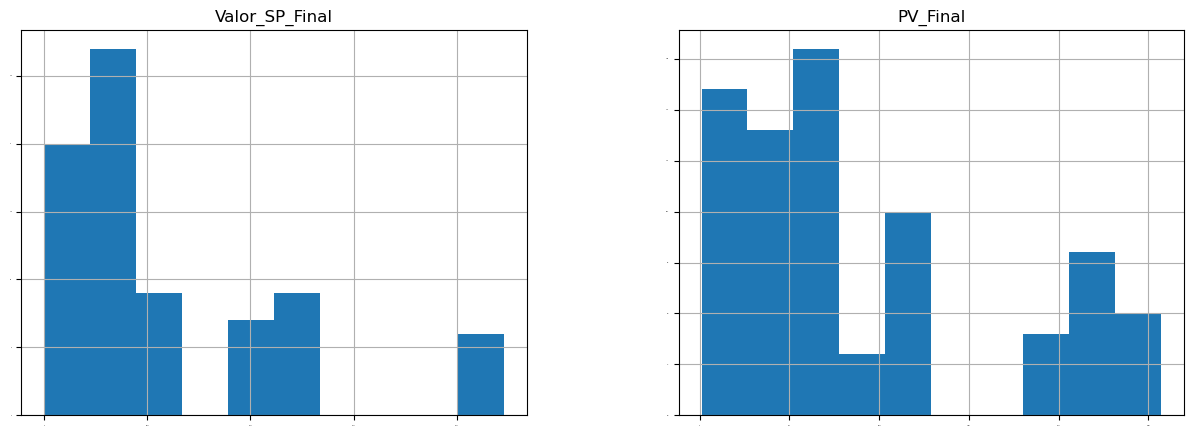

In [136]:
MpTodosSinSolicitud.hist( sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,5))


Histograma por Materia Prima

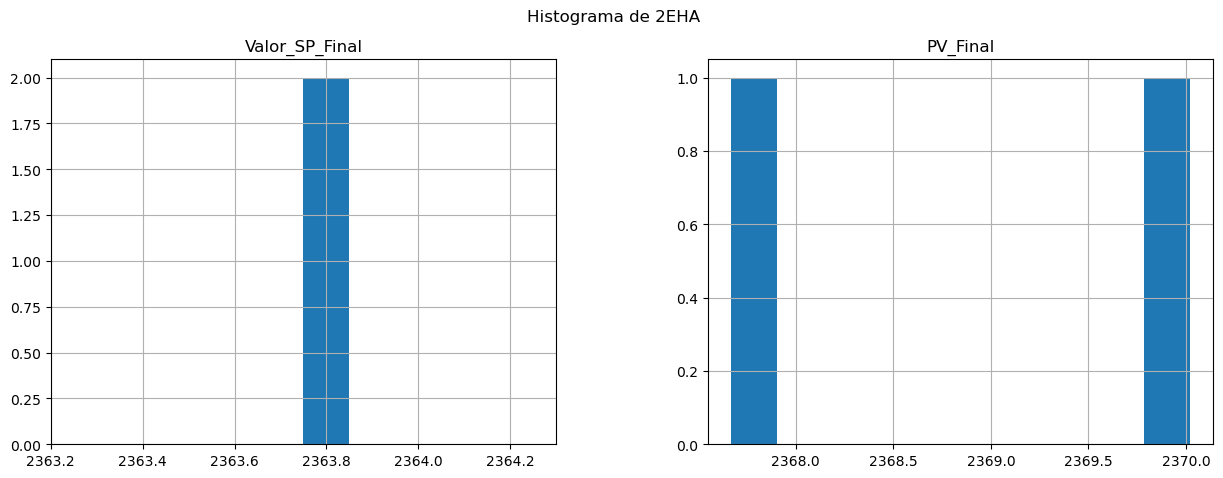

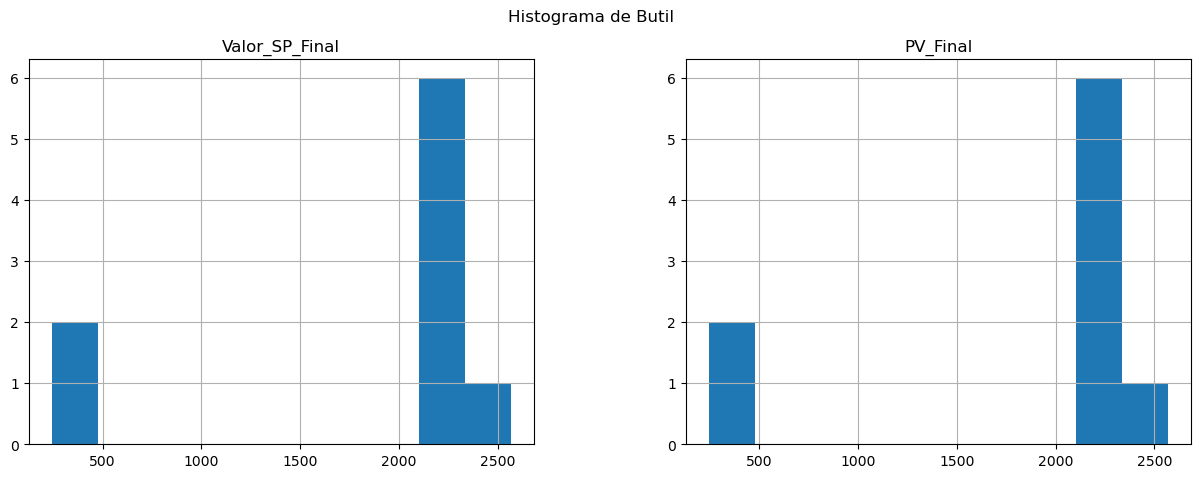

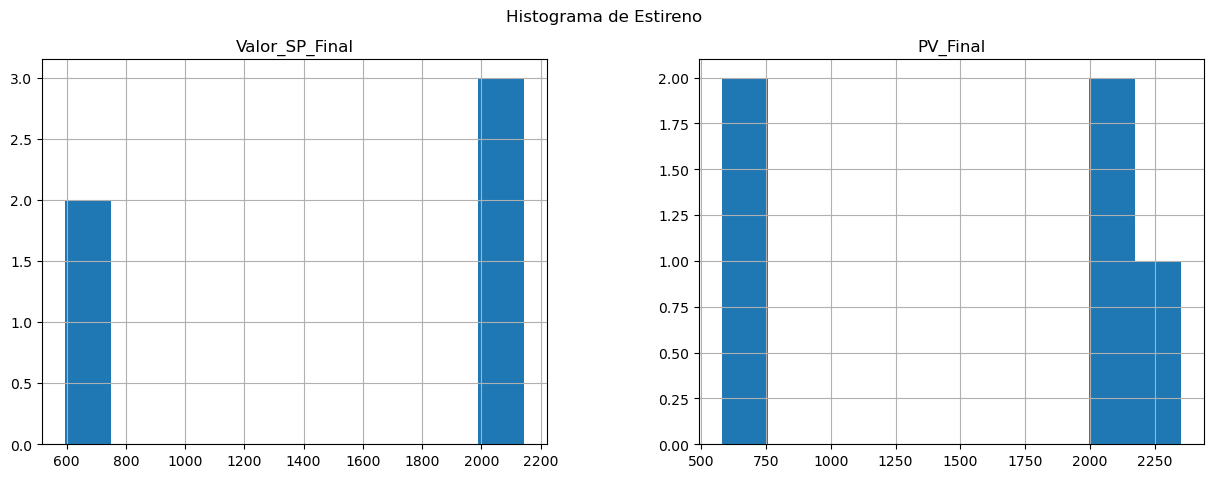

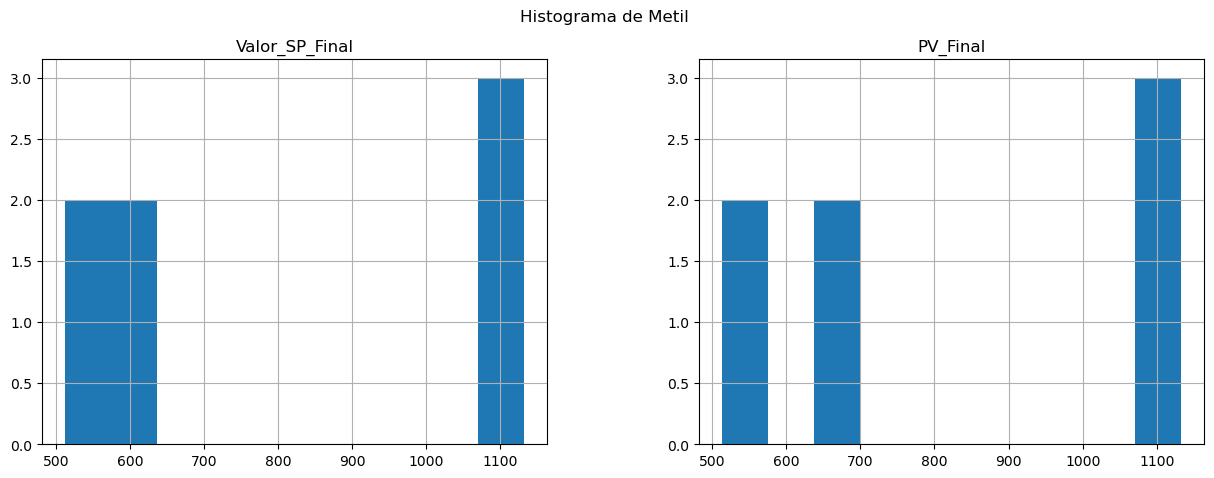

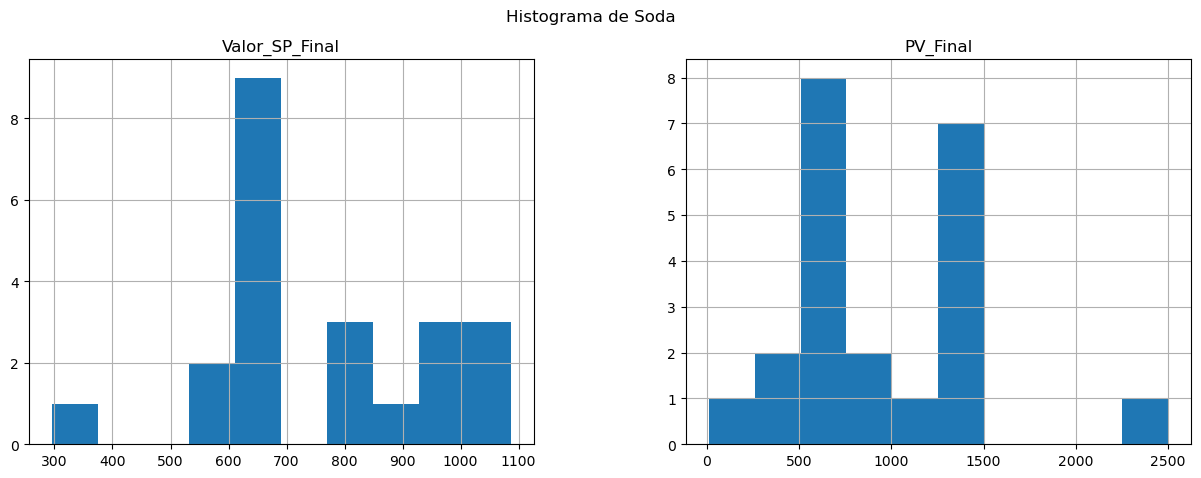

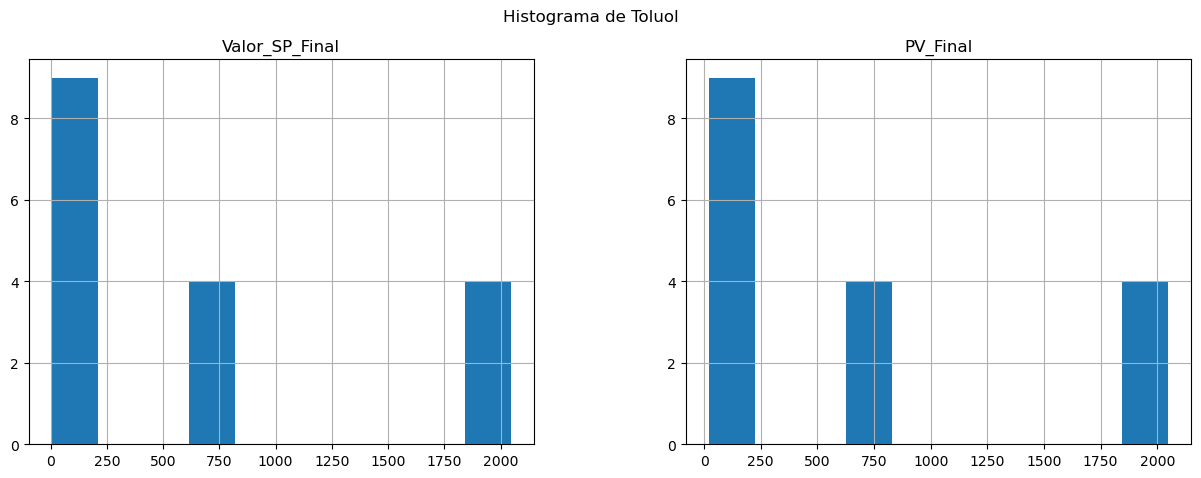

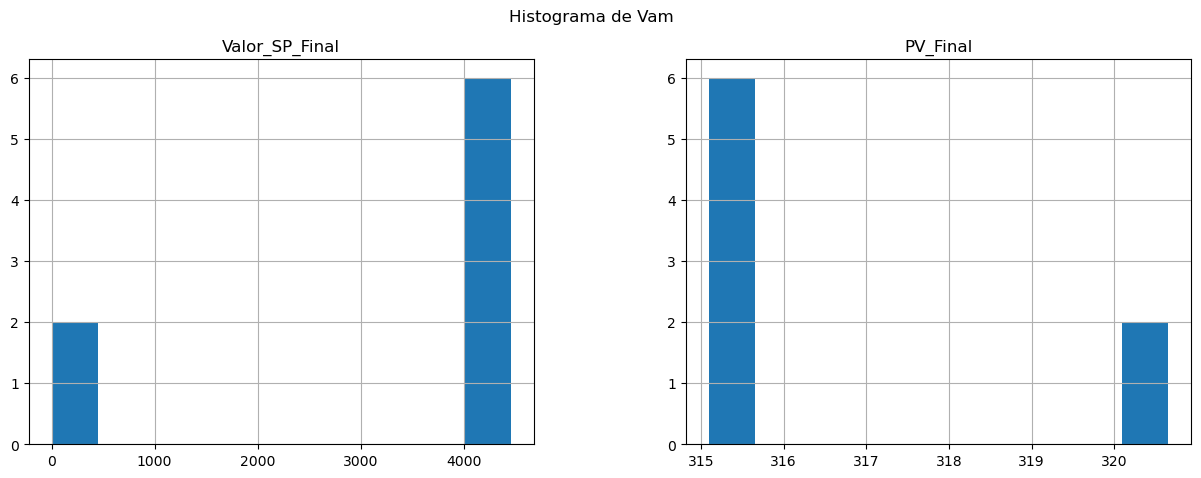

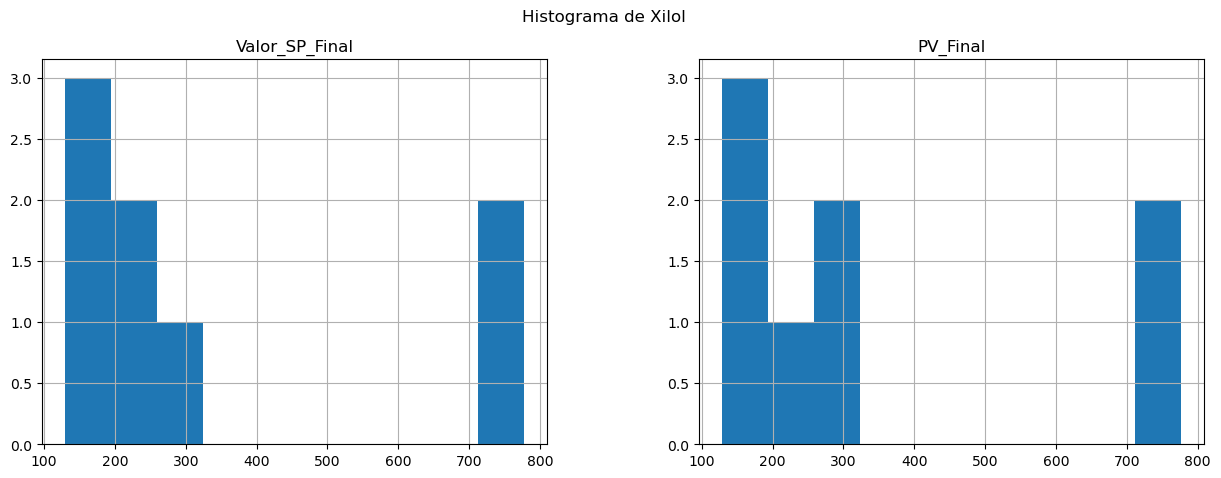

In [137]:
# MpTodosSinSolicitud.groupby("MateriaPrima").hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,5))

for nombre, grupo in MpTodosSinSolicitud.groupby("MateriaPrima"):
    grupo.hist(figsize=(15,5))
    pyplot.suptitle(f'Histograma de {nombre}')  # Título usando el nombre de la MateriaPrima
    pyplot.show()    

Analisis de densidad de Global

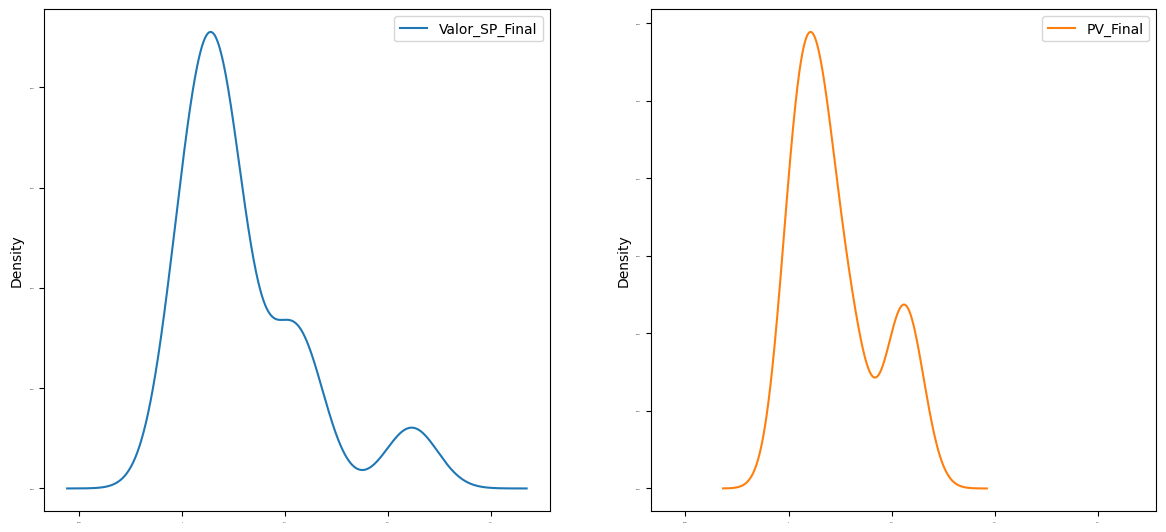

In [138]:
MpTodosSinSolicitud.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(30,30))
pyplot.show()

Analisis de densidad por Materia Prima

C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_7820\2309250979.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=grupo, fill=True)


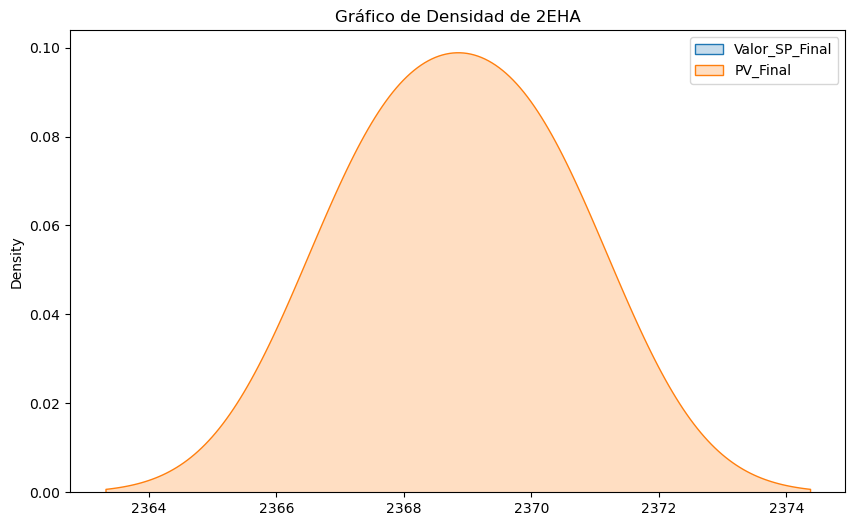

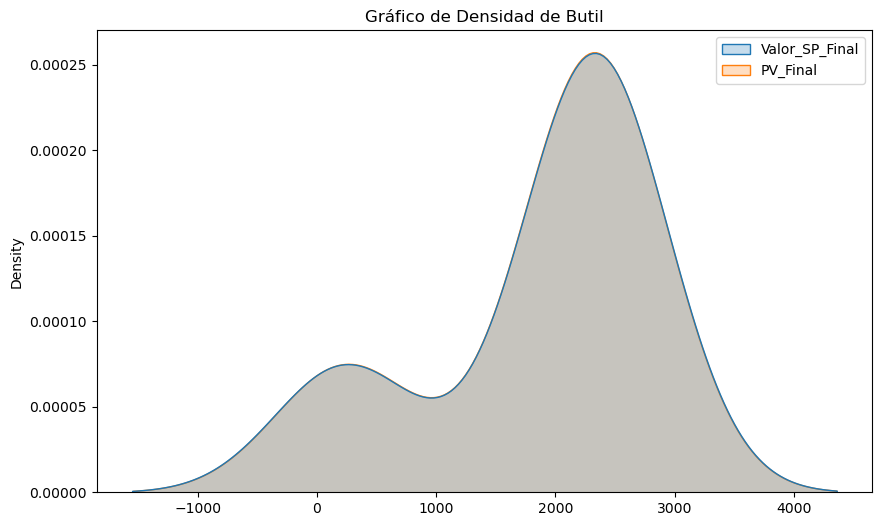

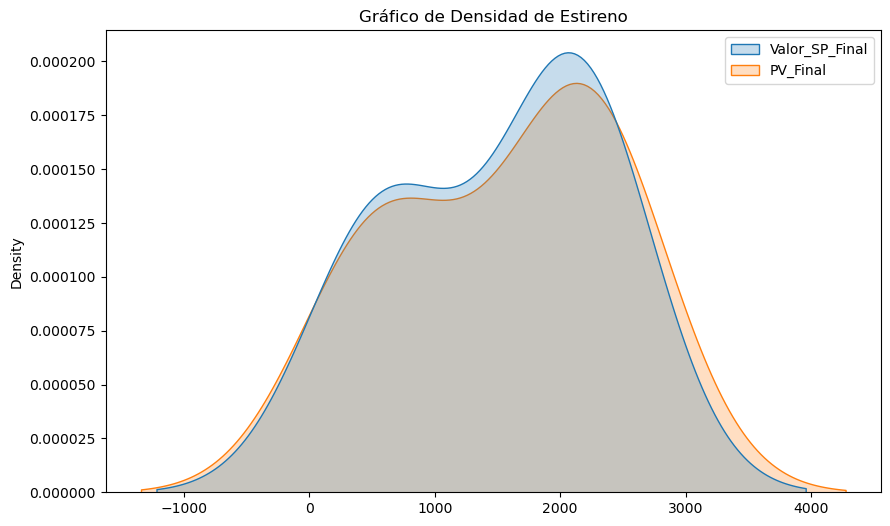

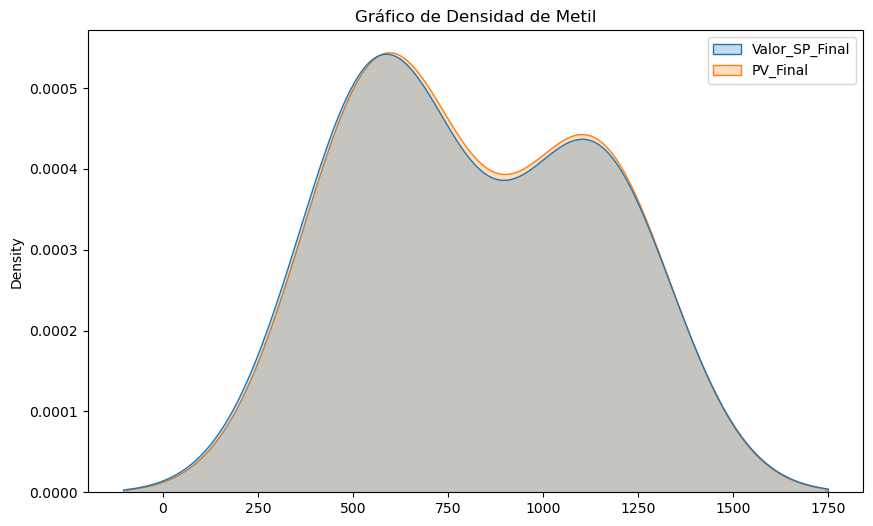

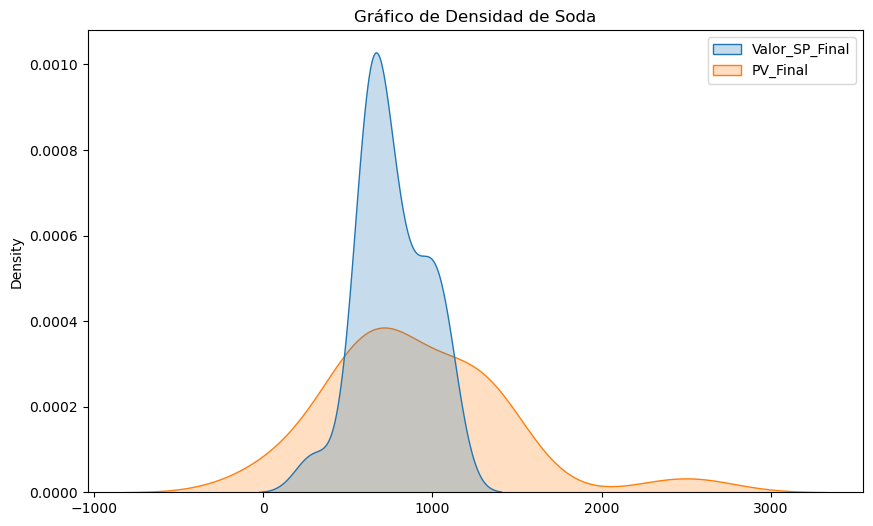

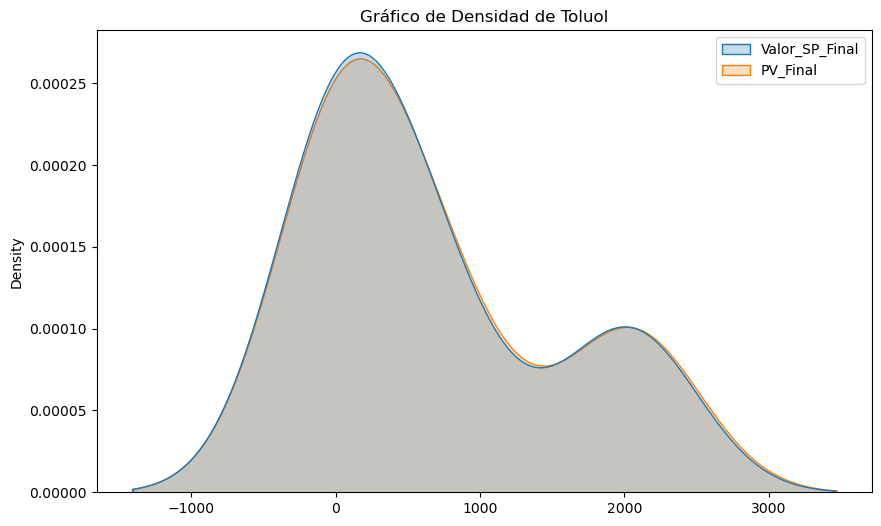

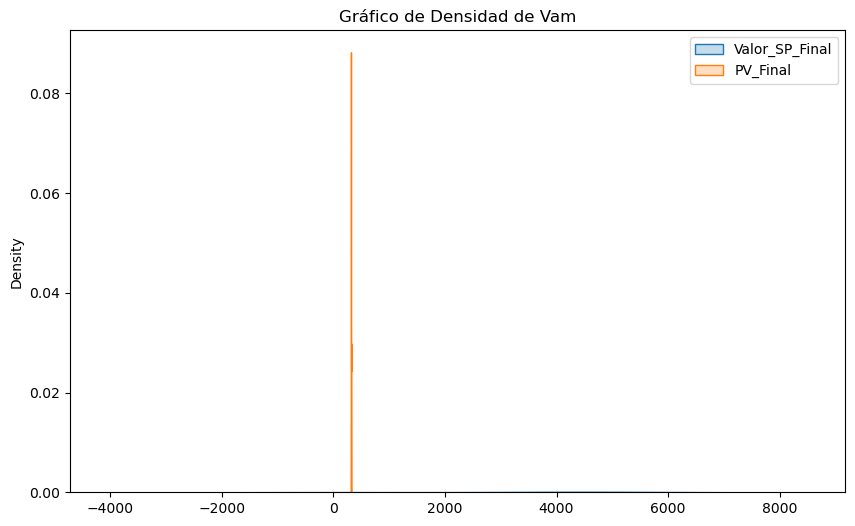

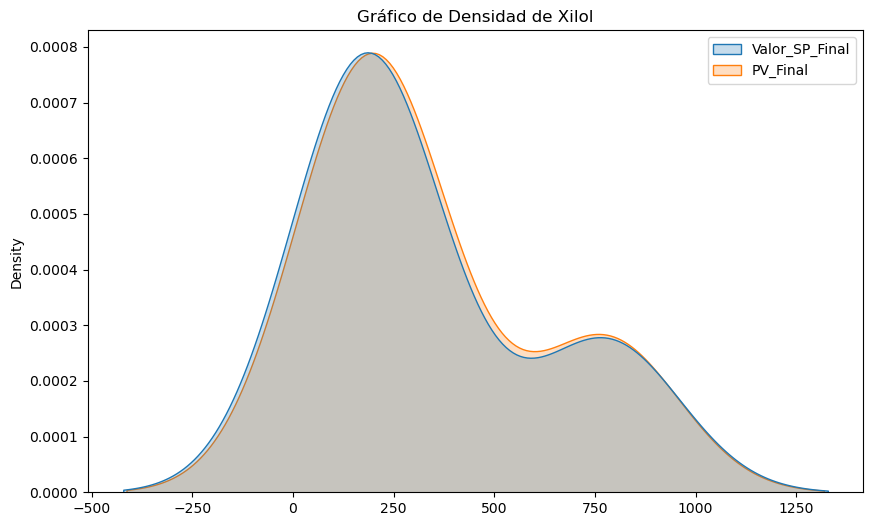

In [139]:
for nombre, grupo in MpTodosSinSolicitud.groupby("MateriaPrima"):
    pyplot.figure(figsize=(10, 6))
    sns.kdeplot(data=grupo, fill=True)
    pyplot.title(f'Gráfico de Densidad de {nombre}')
    pyplot.show()

# MpTodosSinSolicitud.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(30,30))
# pyplot.show()

Análisis de la serie de tiempo


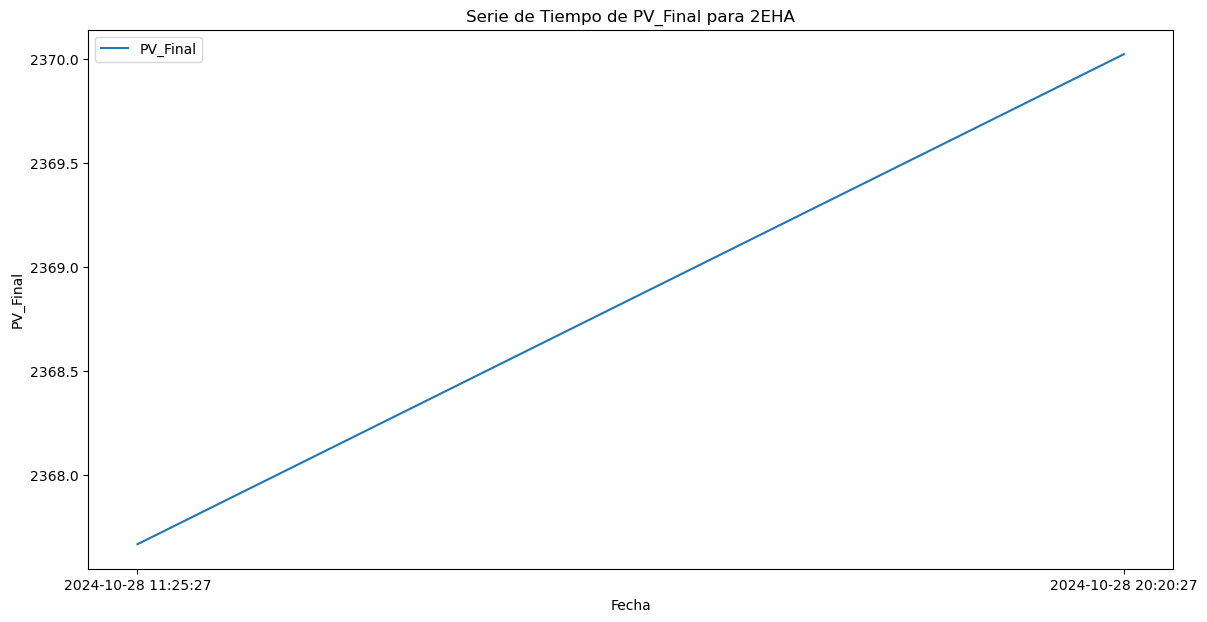

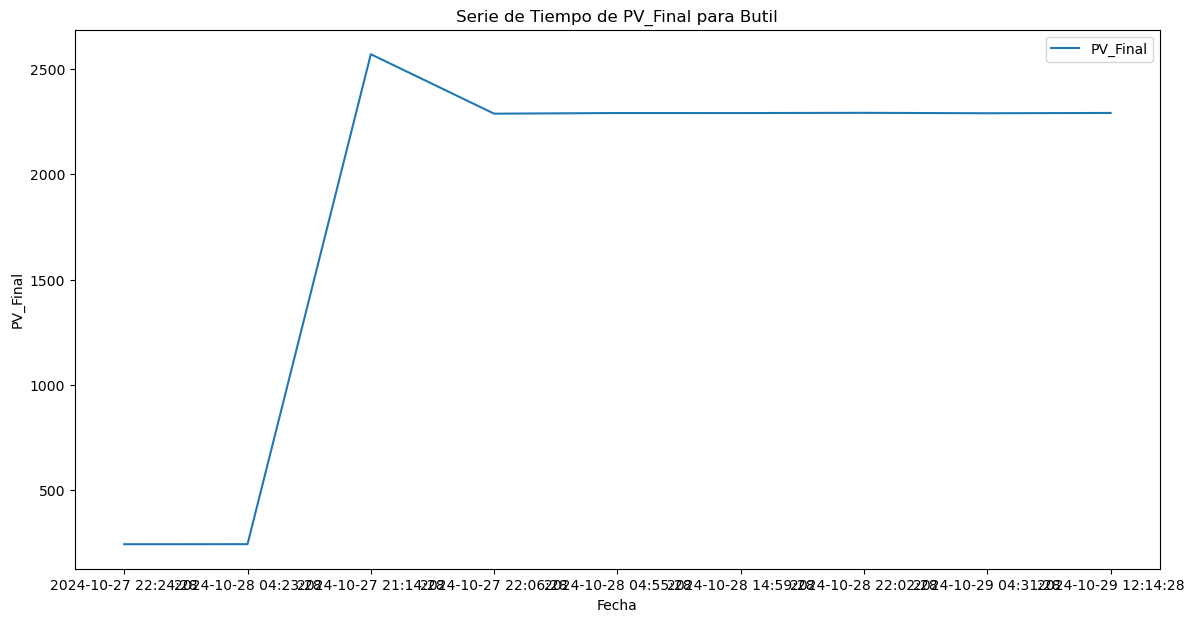

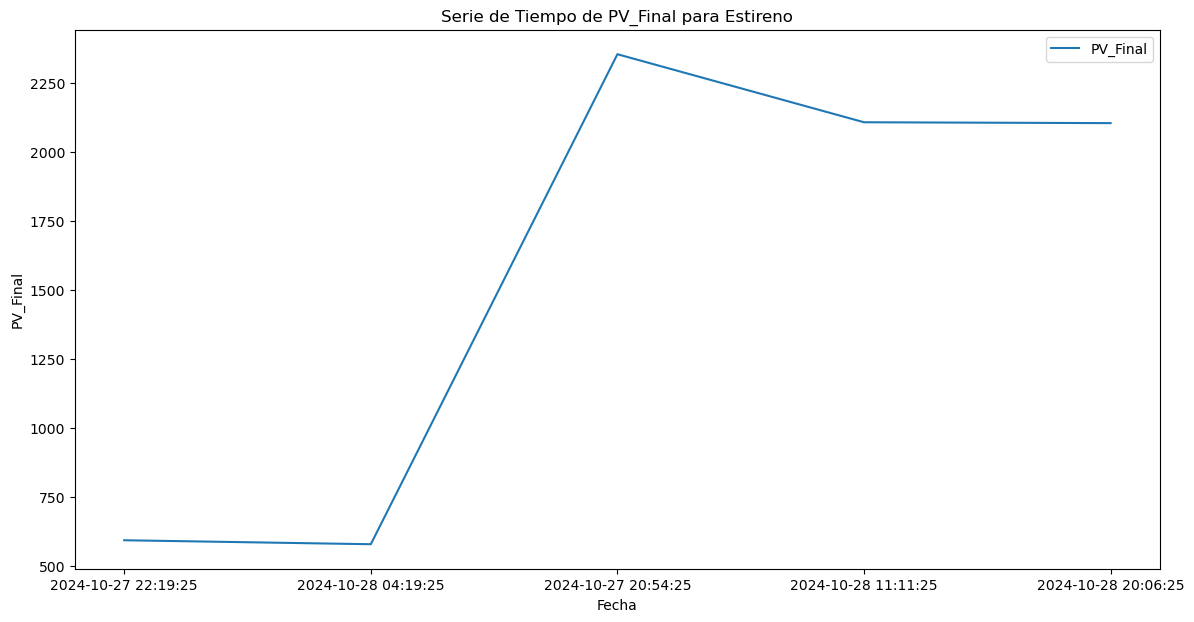

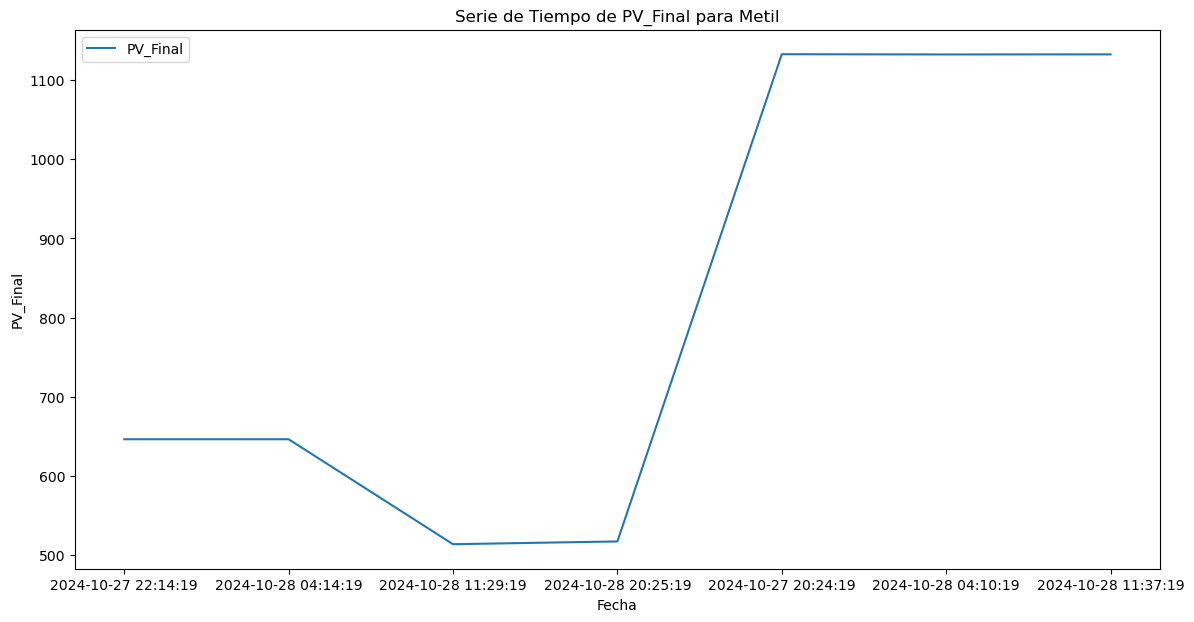

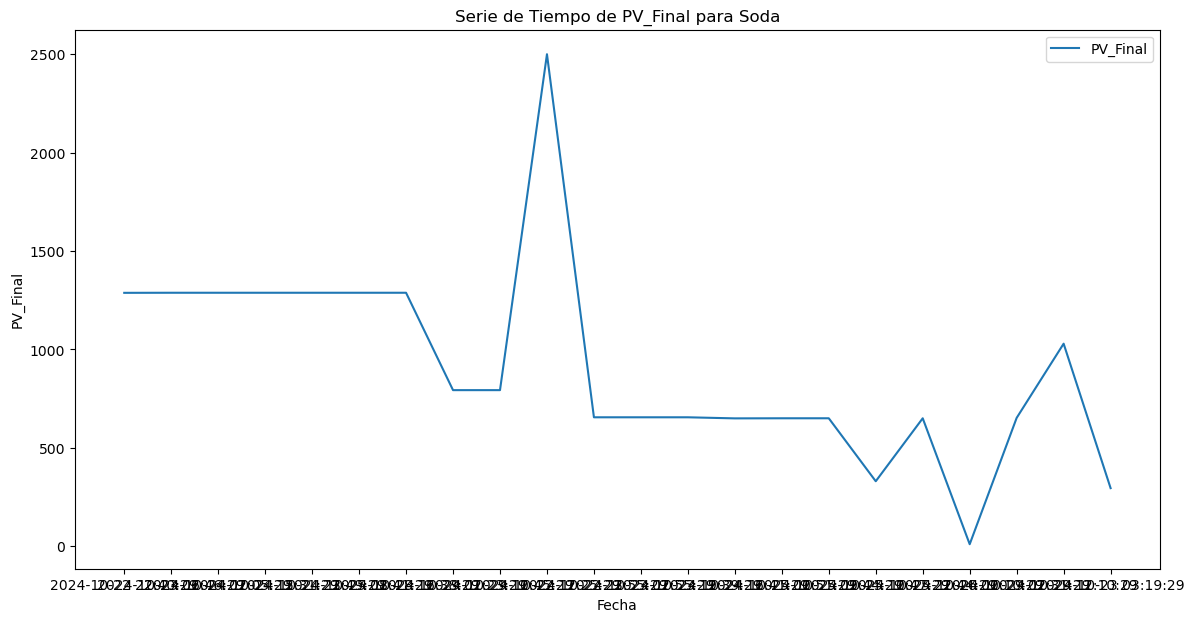

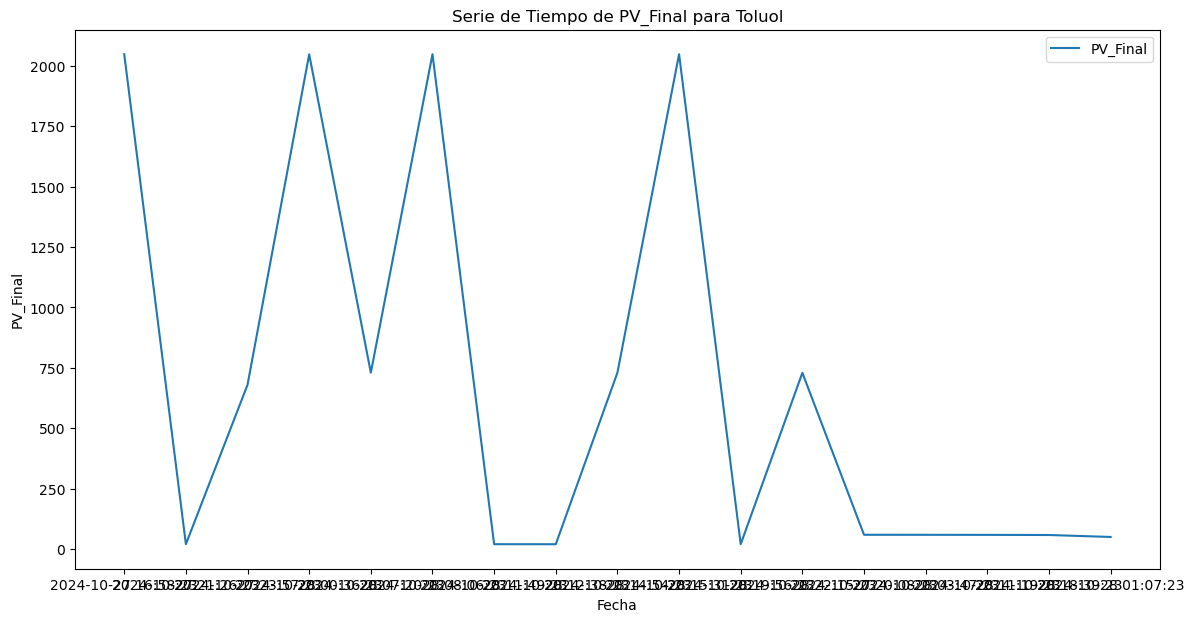

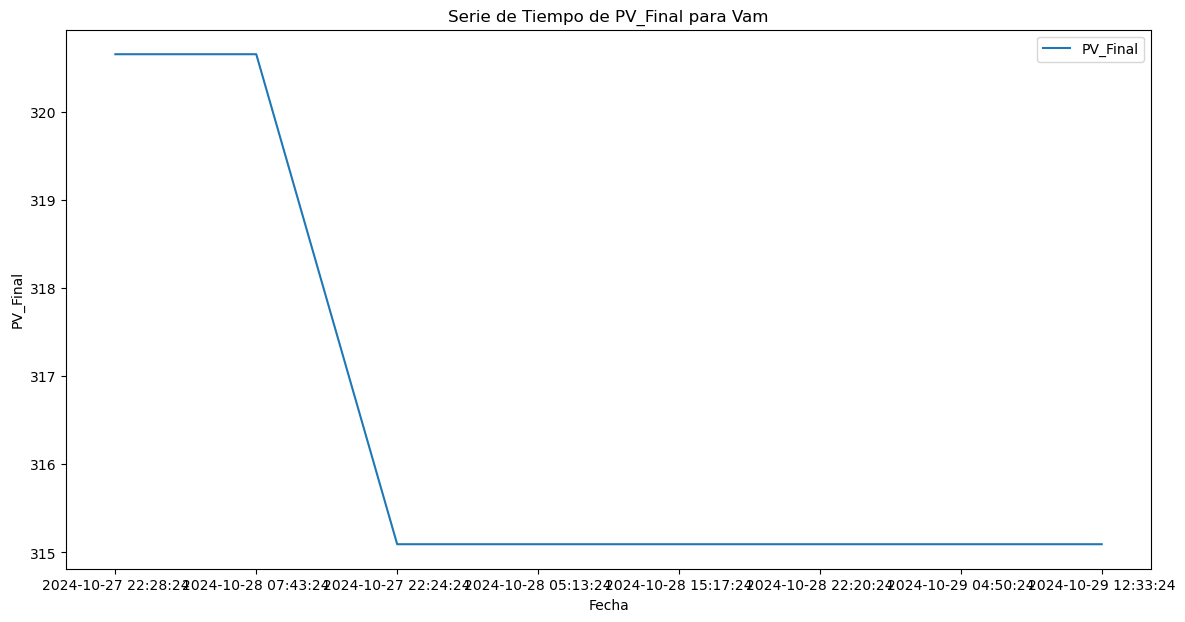

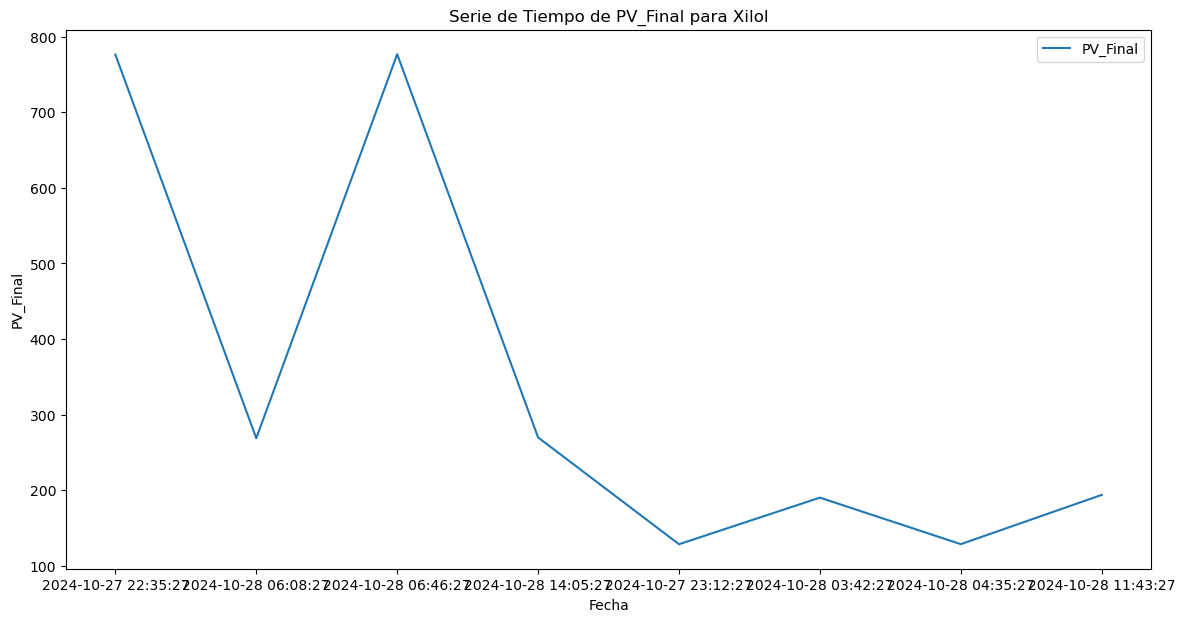

In [140]:
# MpTodosSinSolicitud.groupby("MateriaPrima")

# MpTodosSinSolicitud.to_csv("C:/Temp/MpTodos.csv")
# print(MpTodosSinSolicitud)

for nombre, grupo in MpTodosSinSolicitud.groupby("MateriaPrima"):    
    pyplot.figure(figsize=(14, 7))
    pyplot.plot(grupo['PV_Final'], label='PV_Final')
    pyplot.xlabel('Fecha')
    pyplot.ylabel('PV_Final')
    pyplot.title(f'Serie de Tiempo de PV_Final para {nombre}')
    pyplot.legend()
    pyplot.show()



Se identifica posibles valores atipicos los cuales se deben revisar para identificar si se descartan

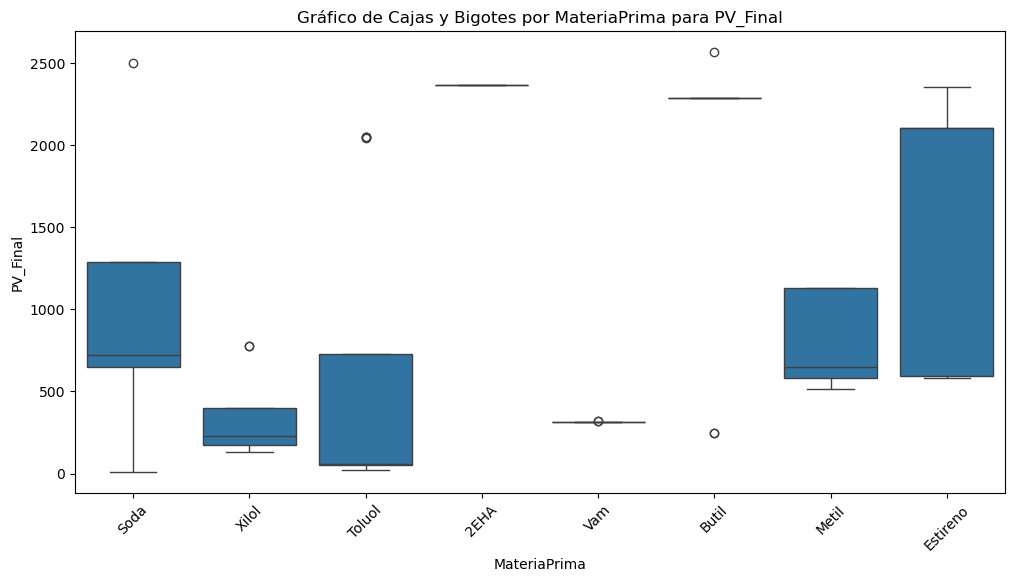

In [167]:
pyplot.figure(figsize=(12, 6))
sns.boxplot(x='MateriaPrima', y='PV_Final', data=MpTodosSinSolicitud)
pyplot.title('Gráfico de Cajas y Bigotes por MateriaPrima para PV_Final')
pyplot.xlabel('MateriaPrima')
pyplot.ylabel('PV_Final')
pyplot.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
pyplot.show()